# Maximum Likelihood Estimation (MLE), a probabilisitic framework for model parameter estimation 
Created by Dr. James G. Shanahan


## Key takeaways:

* Naive Bayes Classifiers
* Likelihood vs probability:

  - $\mathcal{L}(\theta|x, y) = p(y|x, \theta)$
  - $p(y|x, \theta)$ -> "probability of observing the response $y$ given parameter $\theta$ and input $x$"
  - $\mathcal{L}(\theta|x, y)$ -> "likelihood model that parameters $\theta$ produced response $y$ from input $x$"

* Log-likelihood maximization or minimization of the negative log likelihood:

  - We take the $\log$ of the likelihood function for computational convenience
  - The parameters $\theta$ that maximize $\log\mathcal{L}(\theta|x, y)$ are the model parameters that maximize the probability of observing the data.

**Key point**: the log-likelihood is a flexible cost function, and is often used to find model parameters that best fit the data.


##  Notation

\begin{align}
x &\quad \text{input, independent variable}\\
y &\quad \text{response measurement, dependent variable}\\
\mathbf{x} &\quad \text{vector of input values}\\
\mathbf{y} &\quad \text{vector of measurements}\\
\epsilon &\quad \text{measurement error, noise contribution}\\
\epsilon \sim \mathcal{N}(\mu, \sigma^2) &\quad \text{random variable } \epsilon \text{ is distributed according to a Gaussian distribution, with mean } \mu \text{ and variance } \sigma^2\\
\mu &\quad \text{mean}\\
\sigma^2 &\quad \text{variance}\\
\sigma &\quad \text{standard deviation}\\
\theta &\quad \text{parameter}\\
\hat{\theta} &\quad \text{estimate of parameter}\\
\mathcal{L}(\theta|x, y) &\quad \text{likelihood of that parameter } \theta \text{ producing response } y \text{ from input } x \\ 
\mathcal{LL}(\theta|x, y) &\quad \text{log likelihood of that parameter } \theta \text{ producing response } y \text{ from input } x \\ 
\mathcal{NLL}(\theta|x, y) &\quad \text{negative log likelihood of that parameter } \theta \text{ producing response } y \text{ from input } x \\ 
p(y|x, \theta) &\quad \text{probability of observing the response } y \text{ given input } x \text{ and parameter } \theta \\ 
&\quad
\end{align}




## Introduction to Maximum Likelihood Estimation (MLE)

The process of estimating the paramters, say, the $\theta$ of our models from data, $D$, is called model fitting, parameter estimation, or training, and is at the heart of
machine learning. There are many methods for producing such estimates, but most machine learning algorithms can be framed as
optimization problems of the form:

$$\hat{\theta} = \arg\min_{\theta; D}\mathcal{L}(\theta; D) $$

where $\mathcal{L}$ is an objective function commonly known as a loss function in machine learning. We ahve seen several different loss
functions already, such as the MSE loss fucntion for learning linear regression models,  and here we will build on this experience and explore loss functions for probabilistic models. Here the objective function can be framed as the joint probability of seeing the training data given a model. This is joint probability which is maximized is known as the maximum likelihood estimation probability and generally be  solved the optimization-based approaches such as gradient decent. In plain english, the most common approach to parameter estimation is to pick the parameters that assign the highest probability to the training data; this is called maximum likelihood estimation or MLE.

$${\hat {\theta }}_{MLE}={\underset {\theta \in \Theta }{\operatorname {arg\;max} }}\,{\widehat {L}}_{n}(\mathbf {D}|\theta )$$

From a statistical standpoint, a given set of observations $D$ is a random sample from an unknown population. The goal of maximum likelihood estimation is to make inferences about the population that is most likely to have generated the sample, specifically the joint probability distribution of the random variables ${\displaystyle \left\{d_{1},d_{2},\ldots d_m\right\}}$. Let's assume the training examples $D$  is of the form:

$${\displaystyle D = ({\vec {x}}_{1},y_{1}),\,\ldots ,\,({\vec {x}}_{m},y_{m})} \qquad (1) $$

where the ${\displaystyle y_{i}} $ can be are either 1 or −1 (in the case of binary classification), each indicating the class to which the point ${\displaystyle {\vec {x}}_{i}} $ belongs. Each ${\displaystyle {\vec {x}}_{i}} $ is a ${\displaystyle p}$-dimensional real vector. Note setup  can be easily extended to regression and unsupervised machine learning algorithms. 

In addition let's assume the data are independently sampled from the same distribution, so the (conditional) likelihood becomes:

$$\begin{aligned}
P(D|\theta) &= \prod_{i = 1}^m P(y_i | x_i, , \theta) \\
&= \prod_{i = 1}^m \dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp \left[ -\dfrac{\left(y_i - (\beta_0 + \beta_1x_i) \right)^2}{2\sigma^2} \right]
\end{aligned} $$

This is known as the *iid assumption*, which stands for “independent and identically distributed”. We
usually work with the **log likelihood**, which is given by:

$$\begin{aligned}
LL(\theta) \triangleq \log P(D|\theta) &= \sum_{i = 1}^m log P(y_i | x_i, \theta) \\
\end{aligned} $$

This decomposes into a sum of terms, one per example. Thus the Maximum Likelihood Estimation (MLE) is given by:

$$ {\hat {\theta }}_{MLE}= \arg\max_{\theta}\sum_{i = 1}^m log P(y_i | x_i, \theta) $$

Since most optimization algorithms and software implementations are designed to minimize
objective functions,  the MLE objective function is flipped to a minimization problem, commonly known as the (conditional) negative log
likelihood or NLL:


$${NLL {\theta }}  \triangleq -\log p(D|\theta) = -  \sum_{i = 1}^m log P(y_i | x_i, \theta) $$

Minimizing this will also give the MLE. 


$$ {\hat {\theta }}_{MLE}= \arg\min_{\theta} - \sum_{i = 1}^m log P(y_i | x_i, \theta) $$

If the model is unconditional (unsupervised), the MLE becomes

$$ {\hat {\theta }}_{MLE}= \arg\min_{\theta} - \sum_{i = 1}^m log P(x_i, \theta) $$


In summary, [maximum likelihood estimation (MLE)](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) is a method of estimating the parameters of a probability distribution (or of probability distributions in the case of machine learnt models) by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable (i.e., the joint probability of the data is highest given by the maximum likelihood model). The model, point in the parameter space, that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible, and as such the method has become a dominant means of statistical inference.

Most machine learning algorithms can be reframed  probabilistically to leverage the maximum likelihood estimation framework. If the likelihood function is differentiable, the derivative test for determining minima (or maxima) can be applied. In some cases, the first-order conditions of the likelihood function can be solved explicitly; for instance, the ordinary least squares estimator maximizes the likelihood of the linear regression model. Under most circumstances, however, numerical methods will be necessary to find the optimum of the likelihood function. 

### Example: Bernoulli distribution parameter estimation via MLE

Let's take a simple example as an illustration of this point for the Bernoulli distribution.  Recall that a Bernoulli distribution, $p(X;\theta)$ is a simple binary distribution over random variables taking values in $\{0,1\}$, parameterized by $\theta$, which is just the probability of the random variable being equal to one. Now suppose we have some data $x^{(1)}, \ldots, x^{(m)}$ with $x^{(i)} \in \{0,1\})$; what would be a good estimate of the Bernoulli parameter $\theta$ given a dataset?  For example, maybe we flipped a coin 100 times and 30 of these times it came up heads; what would be a good estimate for the probability that this coin comes up heads?

A potentially good response here is that we just estimate $\theta$ to be the proportion of 1's in the data (just sum up the $x^i$s since $x^{(i)} \in \{0,1\})$)
\begin{equation}
\theta = \frac{\mbox{# 1's}}{\mbox{# Total}} = \frac{\sum_{i=1}^m x^{(i)}}{m}.
\end{equation}


But why is this the case?  If we flip the coin just once, for example, would we expect that we should estimate $\theta$ to be either zero or one?  Maybe some other estimators exist that can better handle our expectation that the coin "should" be unbiased, i.e., have $\theta = 1/2$.

While this is certainly true, in fact that maximum likelihood estimate of $\theta$ _is_ just the equation above, the number of ones divided by the total number.  So this gives some rationale that at least under the principles of maximum likelihood esimation, we should believe that this is a good estimate.  However, showing that this is in fact the maximum likelihood estimator is a little more involved that you might expect.  Let's go through the derivation to see how this works.

First, recall that our objective is to choose $\theta$ that maximizes the likelihood, or equivalently the log likelihood of the data, of the observed data $x^{(1)}, \ldots, x^{(m)}$.  This can be written as the following optimization problem:

\begin{equation}
\max_{\theta} \sum_{i=1}^m \log p(x^{(i)};\theta).
\end{equation}

Recall that the probability under a Bernoulli distribution is just $p(X=1;\theta) = \theta$, and $p(X=0;\theta) 1 - \theta$, which we can write compactly as:

\begin{equation}
p(X = x; \theta) = \theta^x (1-\theta)^{(1-x)}
\end{equation}

(it's easy to see that this equals $\theta$ for $x=1$ and $1-\theta$ for $x=0$).  Plugging this in to our maximum likelihood optimization problem we have

\begin{equation}
\max_{\theta} \sum_{i=1}^m \left (x^{(i)}\log\theta + (1-x^{(i)}) \log (1-\theta) \right )
\end{equation}

In order to maximize this equation, let's take the derivative and set it equal to 0 (though we won't show it, it turns out this function just a single maximum point corresponding to a convex optimization problem, which thus must have derivative zero, and so we can find it in this manner).  Let's take the derivative of the objective function with respond to $\theta$, the decision variable that we wish to optimize over:

\begin{equation}
\begin{split}
\frac{d}{d \theta} \sum_{i=1}^m \left (x^{(i)}\log\theta + (1-x^{(i)}) \log (1-\theta) \right ) 
& = \sum_{i=1}^m \frac{d}{d \theta} \left ( x^{(i)}\log\theta + (1-x^{(i)}) \log (1-\theta) \right )  \\
& = \sum_{i=1}^m \left ( \frac{x^{(i)}}{\theta} - \frac{1-x^{(i)}}{1-\theta} \right )
\end{split}
\end{equation}

Setting this this equal to zero, let's try to solve directly to get the root of the gradient function as follows:

\begin{equation}
\begin{split}
& \sum_{i=1}^m \left ( \frac{x^{(i)}}{\theta} - \frac{1-x^{(i)}}{1-\theta} \right ) = 0 \\
\Longrightarrow \;\; & \frac{\sum_{i=1}^m x^{(i)}}{\theta} - \frac{\sum_{i=1}^m (1-x^{(i)})} {1-\theta} = 0 \\
\Longrightarrow \;\; & (1-\theta) \sum_{i=1}^m x^{(i)}  - \theta \sum_{i=1}^m (1-x^{(i)}) = 0 \\
\Longrightarrow \;\; & \sum_{i=1}^m x^{(i)} = \theta \sum_{i=1}^m (x^{(i)} + (1-x^{(i)})) \\
\Longrightarrow \;\; & \sum_{i=1}^m x^{(i)} = \theta m \\
\Longrightarrow \;\; & \theta = \frac{\sum_{i=1}^m x^{(i)}}{m}.
\end{split}
\end{equation}

And there we have it, the surprisingly long proof of the fact that if we want to pick $\theta$ to maximize the likelihood of the observed data, we need to choose it to be equal to the empirical proportion of the ones.  Of course, the objections we had at the beginning of this section were also valid: and in fact this perhaps is _not_ the best estimate of $\theta$ if we have very little data, or some prior information about what values $\theta$ should take.  But it _is_ the estimate of $\theta$ that maximizes the probability of the observed data, and if this is a bad estimate then it reflects more on the underlying problem with this procedure than with the proof above.  Nonetheless, in the presence of a lot of data, there is actually good reason to use the maximum likelihood estimator, and it is extremely common to use in practice.

### Example: MLE for the normal distribution

 In probability theory, a normal distribution is a type of continuous probability distribution for a real-valued random variable that can be represented via the following Gaussian density 

\begin{equation}
p(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2 \sigma^2} \right )
\end{equation}

Assume a single variable that is modelled as a one dimensional normal distribution with mean $\mu$ and variance $\sigma^2$ (note that we're going to directly estimate $\sigma^2$, not $\sigma$ here; here $theta$ is made up of $[\mu$, $\sigma^2]$).  Assume that we have  some data $x^{(1)}, \ldots, x^{(m)}$ with $x^{(i)} \in \mathbb{R}^n$, the maximum likelihood estimates for $[\mu$, $\sigma^2]$) is giving as follows:

$$\begin{aligned}
\mu &= \sum_{i=1}^m \frac{x^{(i)} - \mu}{\sigma^2} \\
\sigma^2 &= \frac{1}{m} \sum_{i=1}^m (x^{(i)} - \mu)^2
\end{aligned} $$

#### Deriving the MLE for the normal distribution (OPTIONAL)
How did we arrive at the previous equation? This corresponds to the maximum likelihood estimate. In this case, the  maximum likelihood estimation problem takes the form:

\begin{equation}
\max_{\mu, \sigma^2} \sum_{i=1}^m \log p(x^{(i)}; \mu, \sigma^2) \;\; \equiv \;\; \max_{\mu, \sigma^2} \sum_{i=1}^m \frac{1}{2} \left(-\log(2 \pi) - \log \sigma^2 -\frac{(x-\mu)^2}{\sigma^2} \right ).
\end{equation}

where the optimization objective can also be abbreviated as the log likelihood $\ell(\mu,\sigma^2)$ to avoid computational precision issues.

Let's first take the derivative with respect to $\mu$ and set it equation to zero:

\begin{equation}
\frac{\partial \ell(\mu,\sigma^2)}{\partial \mu} = \sum_{i=1}^m \frac{x^{(i)} - \mu}{\sigma^2}
\end{equation}

and setting the equation to zero we can solve directly for $\mu$:

\begin{equation}
\sum_{i=1}^m \frac{x^{(i)} - \mu}{\sigma^2} = 0 \; \Longrightarrow \; \sum_{i=1}^m x^{(i)} = m \mu \; \Longrightarrow \mu = \frac{1}{m} \sum_{i=1}^m x^{(i)}
\end{equation}

The maximum likelihood estimate of the mean $\mu$ reduces to the empirical mean of the data.  This may not seem all that surprising, but if you didn't know that the parameter $\mu$ was in fact the mean of the distribution, this would probably be much less apparent initially.  But this derivation illustrates that in order to maximize the probability of the data, we pick the mean to be equal to the empirical mean.

The derivation for $\sigma$ also leads to a closed form solution.  Let's take derivative of the log likelihood equation with repect to $\sigma$:

\begin{equation}
\frac{\partial \ell(\mu,\sigma^2)}{\partial \sigma^2} = \sum_{i=1}^m \frac{1}{2} \left ( -\frac{1}{\sigma^2} + \frac{(x^{(i)} - \mu)^2}{(\sigma^2)^2} \right )
\end{equation}

and set it equal to zero gives and solve directly for  $\sigma^2$

\begin{equation}
\begin{split}
& \sum_{i=1}^m \frac{1}{2} \left ( -\frac{1}{\sigma^2} + \frac{(x^{(i)} - \mu)^2}{(\sigma^2)^2} \right ) = 0 \\
\Longrightarrow \;\; & -\sum_{i=1}^m \sigma^2 + \sum_{i=1}^m (x^{(i)} - \mu)^2 = 0 \\
\Longrightarrow \;\; & \sigma^2 = \frac{1}{m} \sum_{i=1}^m (x^{(i)} - \mu)^2
\end{split}
\end{equation}

i.e., the best estimate for the variance parameter of a Gaussian is simply the empirical estimate of the variance.


#### Intuitive explanation of maximum likelihood estimation for the Normal Distribution
Maximum likelihood estimation is a method that determines values for the parameters (coefficients) of a model. The parameter values are found such that they maximise the likelihood objective function, namely, that the process described by the model that produced the data that were actually observed.
The above definition may still sound a little cryptic so let’s go through an example to help understand this.
Let’s suppose we have observed 10 data points from some process. For example, each data point could represent the length of time in seconds that it takes a student to answer a specific exam question. These 10 data points are shown in the figure below:

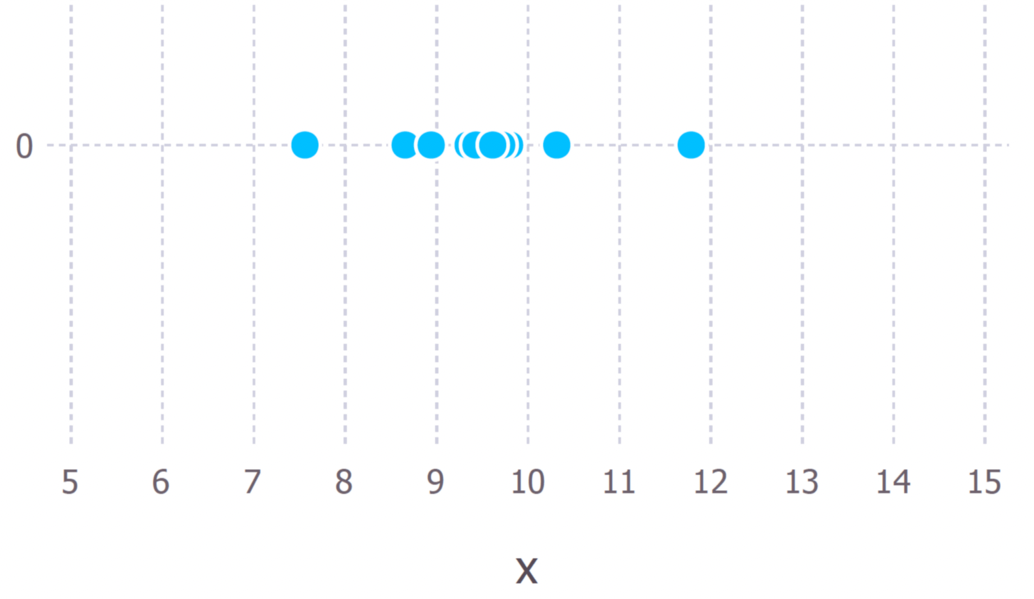

**The 10 (hypothetical) data points that we have observed** 

We first have to decide which model we think best describes the process of generating the data. This part is very important. At the very least, we should have a good idea about which model to use. This usually comes from having some domain expertise but we wont discuss this here.

For these data we’ll assume that the data generation process can be adequately described by a Gaussian (normal) distribution. Visual inspection of the figure above suggests that a Gaussian distribution is plausible because most of the 10 points are clustered in the middle with few points scattered to the left and the right. (Making this sort of decision on the fly with only 10 data points is ill-advised but given that I generated these data points we’ll go with it).

Recall that the Gaussian distribution has 2 parameters. The mean, $μ$, and the standard deviation, $σ$. Different values of these parameters result in different curves (just like with the straight lines above). We want to know which curve was most likely responsible for creating the data points that we observed? (See figure below). Maximum likelihood estimation is a method that will find the values of μ and σ that result in the curve that best fits the data.

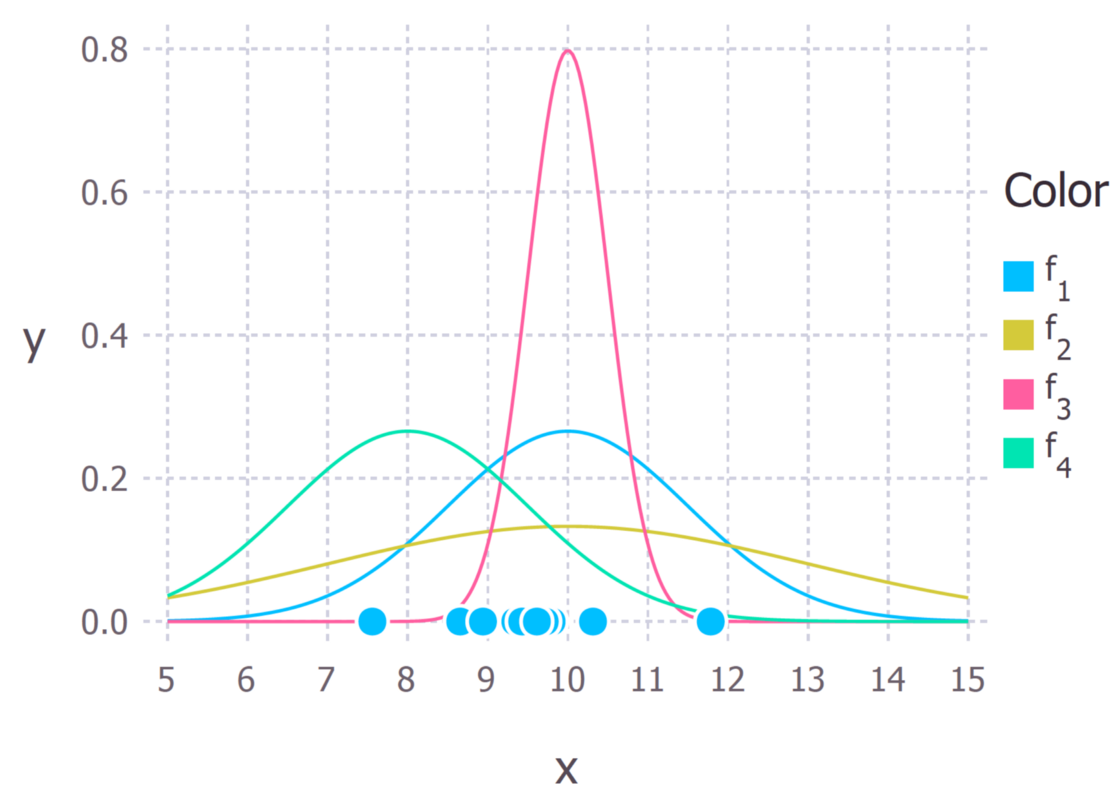

**Figure: The 10 data points and possible Gaussian distributions from which the data were drawn. f1 is normally distributed with mean 10 and variance 2.25 (variance is equal to the square of the standard deviation), this is also denoted f1 ∼ N (10, 2.25). f2 ∼ N (10, 9), f3 ∼ N (10, 0.25) and f4 ∼ N (8, 2.25). The goal of maximum likelihood is to find the parameter values that give the distribution that maximise the probability of observing the data.**

The true distribution from which the data were generated was $f_1 ~ N(10, 2.25)$, which is the blue curve in the figure above.

##### Calculating the Maximum Likelihood Estimates
Now that we have an intuitive understanding of what maximum likelihood estimation is we can move on to learning how to calculate the parameter values. The values that we find are called the maximum likelihood estimates (MLE).
Again we’ll demonstrate this with an example. Suppose we have three data points this time and we assume that they have been generated from a process that is adequately described by a Gaussian distribution. These points are $9, 9.5 and 11$. How do we calculate the maximum likelihood estimates of the parameter values of the Gaussian distribution $μ$ and $σ$?
What we want to calculate is the total probability of observing all of the data, i.e., the joint probability distribution of all observed data points. To do this we would need to calculate some conditional probabilities, which can get very difficult. So it is here that we’ll make our first assumption. The assumption is that each data point is generated independently of the others. This assumption makes the maths much easier. If the events (i.e. the process that generates the data) are independent, then the total probability of observing all of data is the product of observing each data point individually (i.e. the product of the marginal probabilities).
The probability density of observing a single data point x, that is generated from a Gaussian distribution is given by [e.g., the normal distribution $N(\mu, \sigma)$]:

$$ Pr(x;\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$


Sometime, we use the semi colon  in the notation P(x; μ, σ);  this puts emphasisis on the fact that the symbols that appear after it are parameters of the probability distribution. So it shouldn’t be confused with a conditional probability (which is typically represented with a vertical line e.g. P(A| B)).

In our example the total (joint) probability density of observing the three data points is given by:

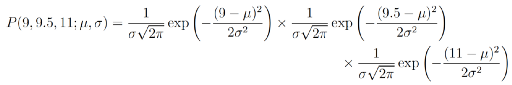

We just have to figure out the values of $μ$ and $σ$ that results in giving the maximum value of the above likelihood expression. This can be accomplished in this scenario via a closed form solution. 


### More formally
The moddel from the above simple example can be summarized as a statistical distribution [e.g., the normal distribution $N(\mu, \sigma)$].

$$ Pr(x|\theta) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

The probability of drawing value $x_i$ from the distribution $f(x|\theta)$ is $f(x_i|\theta)$. The probability of drawing the following vector of two observations $(x_1,x_2)$ from the distribution $f(x|\theta)$ is $f(x_1|\theta)\times f(x_2|\theta)$. We define the likelihood function of $N$ draws $(x_1,x_2,...x_N)$ from a model or distribution $f(x|\theta)$ as $\mathcal{L}$.

$$ \mathcal{L}(x_1,x_2,...x_N|\theta) \equiv \prod_{i=1}^N f(x_i|\theta) $$

Because it can be numerically difficult to maximize a product of percentages (one small value can make dominate the entire product), it is almost always easier to use the log likelihood function $\ln(\mathcal{L})$.

$$ \ln\Bigl(\mathcal{L}(x_1,x_2,...x_N|\theta)\Bigr) \equiv \sum_{i=1}^N \ln\Bigl(f(x_i|\theta)\Bigr) $$

The maximum likelihood estimate $\hat{\theta}_{MLE}$ is the following:

$$ \hat{\theta}_{MLE} = \theta:\quad \max_\theta \: \ln\mathcal{L} = \sum_{i=1}^N\ln\Bigl(f(x_i|\theta)\Bigr) $$

# Naive Bayes classifiers
In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (inputs/features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers (e.g., logistic regression. In the statistics literature, naive Bayes models are known under a variety of names, including simple Bayes and independence Bayes. 

For more background on Naive Bayes (some of the following is based on this webpage):

* https://en.wikipedia.org/wiki/Naive_Bayes_classifier

## Probabilistic model 

Abstractly, naïve Bayes is a conditional probability model for classifying data: given a problem instance to be classified, represented by a vector $\mathbf{x} = (x_1, \ldots, x_n)$ representing some $n$ features (independent variables), it assigns to this instance class probabilities:

$$p(C_k \mid x_1, \ldots, x_n)$$

for each of $k$ possible outcomes or `classes` $C_k$.

The problem with the above formulation is that if the number of features $n$ is large or if a feature can take on a large number of values, then basing such a model on conditional probability is infeasible (the representation complexity is exponential and the data requirements are exponential). The model must therefore be reformulated to make it more tractable. Using Bayes' theorem, the conditional probability can be decomposed as

$$p(C_k \mid \mathbf{x}) = \frac{p(C_k) \ p(\mathbf{x} \mid C_k)}{p(\mathbf{x})} $$

In plain English, using Bayesian probability terminology, the above equation can be written as

$$\text{posterior} = \frac{\text{prior} \times \text{likelihood}}{\text{evidence}} $$

In practice, the denominator can be dropped from this calculation as it does not depend on the class variable $C$ and the values of the features $x_i$ are given, so that the denominator is effectively constant.
The numerator is equivalent to the joint probability model

$$p(C_k, x_1, \ldots, x_n)$$


which can be rewritten as follows, using the [Chain rule (of probability)](https://en.wikipedia.org/wiki/Chain_rule_(probability)) for repeated applications of the definition of conditional probability:

$$
\begin{align}
p(C_k, x_1, \ldots, x_n) & = p(x_1, \ldots, x_n, C_k) \\
                        & = p(x_1 \mid x_2, \ldots, x_n, C_k) \ p(x_2, \ldots, x_n, C_k) \\
                        & = p(x_1 \mid x_2, \ldots, x_n, C_k) \ p(x_2 \mid x_3, \ldots, x_n, C_k) \ p(x_3, \ldots, x_n, C_k) \\
                        & = \cdots \\
                        & = p(x_1 \mid x_2, \ldots, x_n, C_k) \ p(x_2 \mid x_3, \ldots, x_n, C_k) \cdots   p(x_{n-1} \mid x_n, C_k) \ p(x_n \mid C_k) \ p(C_k) \\
\end{align}
$$

Now the "naïve" conditional independence assumptions come into play: assume that all features in <math>\mathbf{x}</math> are mutually independent, conditional on the category <math>C_k</math>. Under this assumption,

$$p(x_i \mid x_{i+1}, \ldots ,x_{n}, C_k ) = p(x_i \mid C_k)\,$$.

Thus, the joint model can be expressed as

$$
\begin{align}
p(C_k \mid x_1, \ldots, x_n) & \varpropto p(C_k, x_1, \ldots, x_n) \\
                            & \varpropto p(C_k) \ p(x_1 \mid C_k) \ p(x_2\mid C_k) \ p(x_3\mid C_k) \ \cdots \\
                            & \varpropto p(C_k) \prod_{i=1}^n p(x_i \mid C_k)\,,
\end{align}
$$

where $\varpropto$ denotes proportionality.

This means that under the above independence assumptions, the conditional distribution over the class variable $C$ is:

$p(C_k \mid x_1, \ldots, x_n) = \frac{1}{Z} p(C_k) \prod_{i=1}^n p(x_i \mid C_k)$

where the evidence $Z = p(\mathbf{x}) = \sum_k p(C_k) \ p(\mathbf{x} \mid C_k)$ is a scaling factor dependent only on $x_1, \ldots, x_n$, that is, a constant if the values of the feature variables are known.

## Prediction rule for the Naive Bayes classifier 

The discussion so far has derived the independent feature model (think continous features, discrete features), that is, the naïve Bayes probability model. The naïve Bayes classifier combines this model with a decision rule. One common rule is to pick the hypothesis that is most probable; this is known as the maximum a posteriori or MAP decision rule. The corresponding classifier, a Bayes classifier, is the function that assigns a class label $\hat{y} = C_k$for some $k$ as follows:

$$\hat{y} = \underset{k \in \{1, \ldots, K\}}{\operatorname{argmax}} \ p(C_k) \displaystyle\prod_{i=1}^n p(x_i \mid C_k)$$

## Estimating the parameters of a NB model

A class's prior may be calculated by assuming equiprobable classes (''i.e.'', $p(C_k) = 1/K$), or by calculating an estimate for the class probability from the training set (''i.e.'', $\text{prior for a given class} = \frac{\text{<number of samples in the class>}}{\text{<total number of samples>}}$). To estimate the parameters for a feature's distribution, one must assume a distribution or generate nonparametric models for the features from the training set.

The assumptions on distributions of features are called the "event model" of the naïve Bayes classifier. 
* For discrete features like the ones encountered in document classification (include spam filtering), multinomial and Bernoulli distributions are popular. These assumptions lead to two distinct models, which are often confused.


### Multinomial naïve Bayes 
Naive Bayes models can be used to classify data with discrete input variables such as text documents. Here each document is represented by a feature vector with integer elements whose value is the frequency of that word in the document.

Consider the follow example with a vocabulary of:

`V = {blue,red, dog, cat, biscuit, apple}`

In this case, the vocabulary size, |V|, is 6. Now consider the (short) document “the blue dog ate a blue biscuit”. This data example can be modeled as a multinomial feature vector $d_{mul}$ or as Bernoulli feature vector $d_{ber}$. Then  documents could be represented in raw vector form as follows:


$$\begin{aligned}
d_{mul} &= (2, 0, 1, 0, 1, 0)^T \\
d_{ber} &= (1, 0, 1, 0, 1, 0)^T
\end{aligned}$$
 
With a multinomial event model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial $(p_1, \dots, p_n)$ where $p_i$ is the probability that event $i$ occurs (or {$K$ such multinomials in the multiclass case). A feature vector $\mathbf{x} = (x_1, \dots, x_n)$is then a histogram, with $x_i$ counting the number of times event $i$ was observed in a particular instance. This is the event model typically used for document classification, with events representing the occurrence of a word in a single document (see bag of words assumption). As for the multinomial model, the parameters of the likelihood are the probabilities of each word given
the document class $P(x_i||C_k)$, and the model parameters also include the prior probabilities $P(C_k)$. To
estimate these parameters from a training set of documents, {D_1, D_2, . . . , D_m}, let $freq(x_{ijk})$ be an count corresponding to the number of times word $x_i$ occurs in document $D_j$ for documents  $D_j$ that belong to class $k$. Here $m$ denotes total number of documents in the training set. The class conditional probabilities can be estimated directly from the data (in closed form) as follows:



$$
p(x_i \mid C_k) =  \frac{(\sum_{j=1}^m freq(x_{ijk}))}{(\sum_{j=1}^m \sum_{g=1}^v freq(x_{gjk}))}
$$


$\sum_{j=1}^m freq(x_{ijk}))$ is the number of times that word $x_i$ occurs across all examples documents of class $k$. And  $ \frac{(\sum_{j=1}^m freq(x_{ijk}))}{(\sum_{j=1}^m \sum_{g=1}^v freq(x_{gjk}))}$ denotes the relative frequency of word $x_i$ across all documents for class $k$. Think in terms of doing a word count of all the documents for a class and computing the relative frequency of each term from the resulting frequncy distribution. 


The multinomial naïve Bayes classifier becomes a linear classifier when expressed in log-space:

$$
\begin{align}\tag{multinomial naïve Bayes classifier}
\log p(C_k \mid \mathbf{x}) & \varpropto \log \left( p(C_k) \prod_{i=1}^n {p_{ki}}^{x_i} \right) \\
                       & = \log p(C_k) + \sum_{i=1}^n x_i \cdot \log p_{ki}                 \\
                       & = b + \mathbf{x}^\top\mathbf{w}_k
\end{align}
$$

where $b = \log p(C_k)$ and $w_{ki} = \log p_{ki}$. For a more complete presentation and derivation please see [here](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

#### Regularization in Multinomial Naive Bayes models
If a given class and feature value never occur together in the training data, then the frequency-based probability estimate will be zero, because the probability estimate is directly proportional to the number of occurrences of a feature's value. This is problematic because it will wipe out all information in the other probabilities when they are multiplied. Therefore, it is often desirable to incorporate a small-sample correction, called pseudocount, in all probability estimates such that no probability is ever set to be exactly zero. This way of regularizing naive Bayes is called Laplace smoothing when the pseudocount is one, and Lidstone smoothing in the general case.

In otherwords, a drawback of relative frequency estimates for the multinomial model—is that zero
counts result in estimates of zero probability. This is a bad thing because the Naive Bayes equation for
the likelihood  involves taking a product of probabilities: if any one of the terms of
the product is zero, then the whole product is zero. This means that the probability of the document
belonging to the class in question is zero—which means it is impossible. Just because a word does not occur in a document class in the training data does not mean that it cannot occur in any document of that class.

The problem is vanilla multinomial Naive Bayes is that it underestimates the likelihoods of words that do not occur in the
data. Even if word w is **not** observed for class k in the training set, we would still like P(w | Ck) > 0.
Since probabilities must sum to 1, if unobserved words have underestimated probabilities, then those
words that are observed must have overestimated probabilities. Therefore, one way to alleviate the problem is to remove a small amount of probability allocated to observed events and distribute this across the unobserved events. A simple way to do this, sometimes called Laplace’s law of succession or **add-one smoothing**, adds a count of one to each word in the model vocabulary. If there are V unique words  in total, then word class conditionals can be estimated as follows:



$$
p(x_i \mid C_k) =  \frac{(1+ \sum_{j=1}^m freq(x_{ijk}))}{V + (\sum_{j=1}^m \sum_{g=1}^v freq(x_{gjk}))}
$$

#### Worked example of Multinomial Naive Bayes

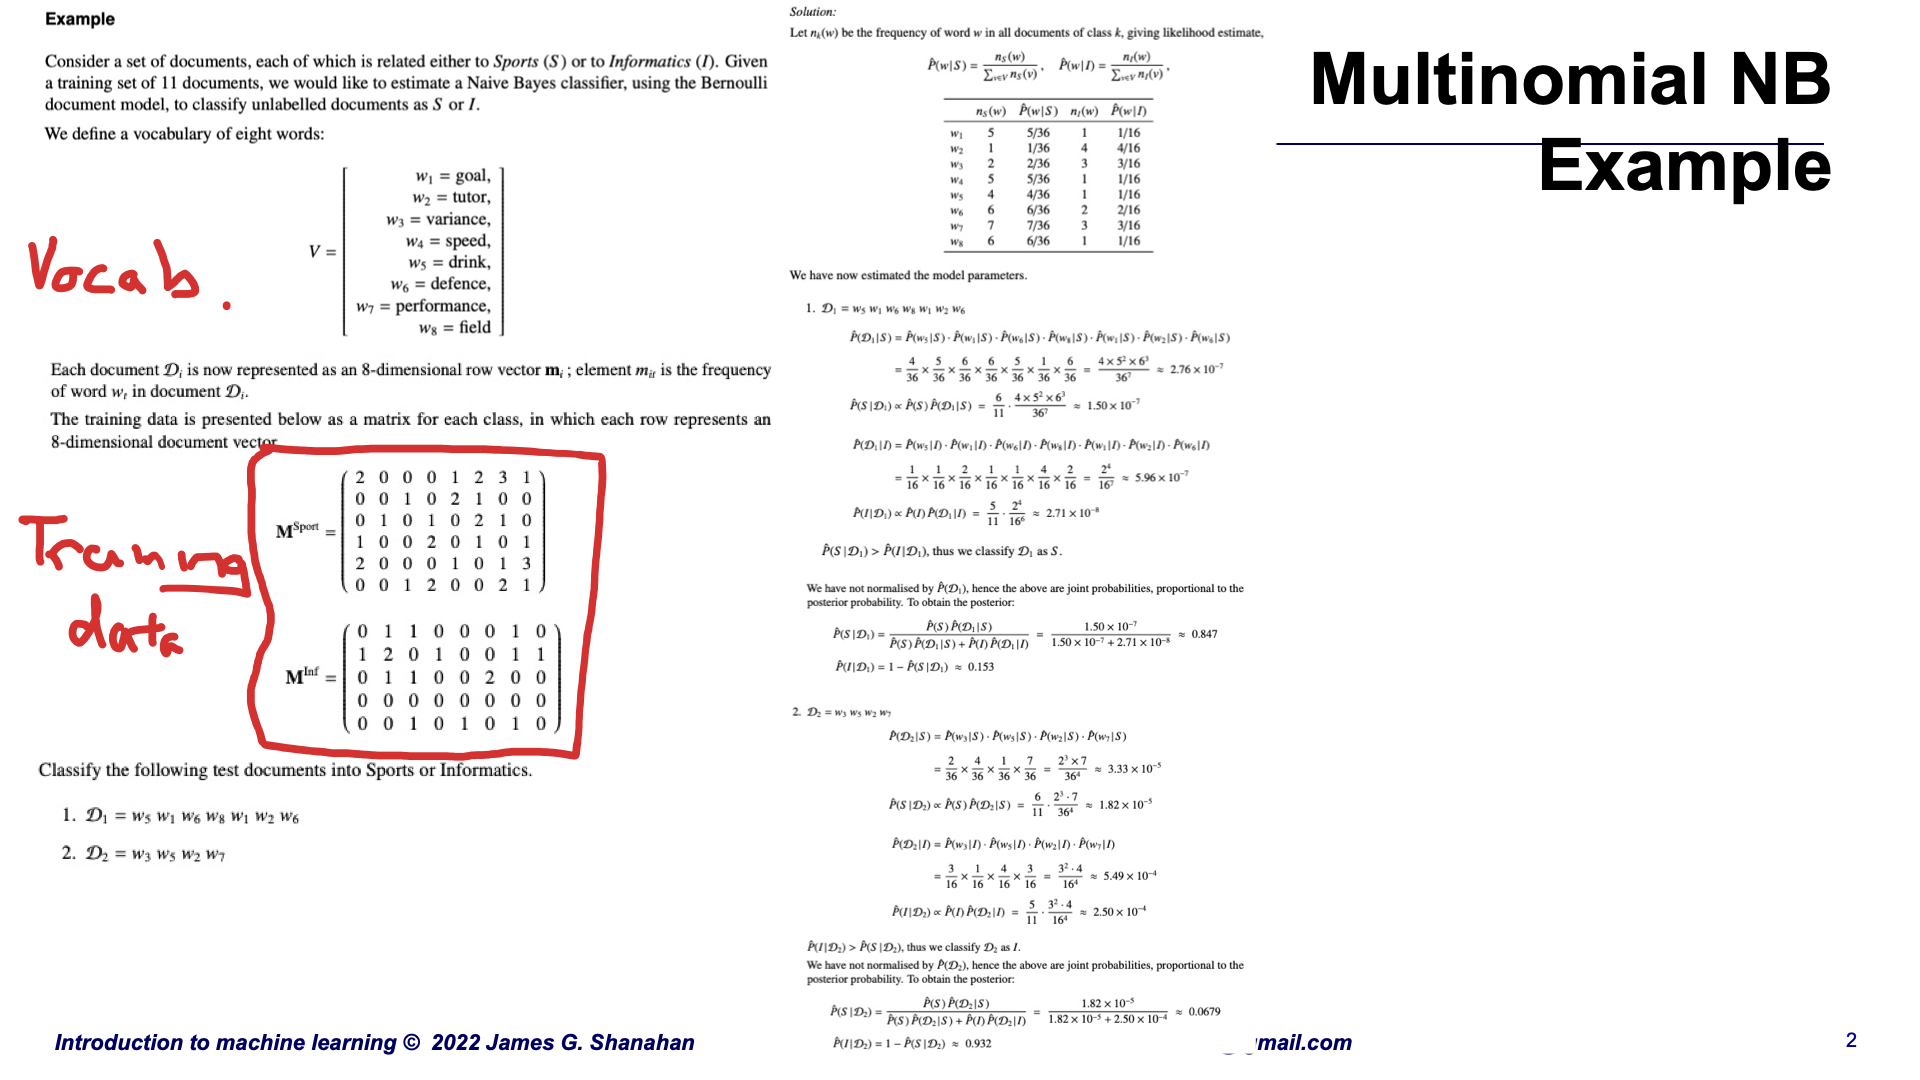

### Bernoulli Naive Bayes (using **term occurrence** features as opposed to term frequencies)
An alternaitve way to estimate the word class conditional probabilities is via the multivariate Bernoulli event model, where features are treated as independent Booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary **term occurrence** features are used rather than term frequencies. If $x_{i}$ is a boolean expressing the occurrence or absence of the i'th term from the vocabulary, then the likelihood of a document given a class $Y_{k}$  is given by

$$p(\mathbf{x} \mid Y_k) = \prod_{i=1}^n p_{ki}^{x_i} (1 - p_{ki})^{(1-x_i)}$$

where $p_{ki}$ is the probability of class $C_k$ generating the term $x_i$. This event model is especially popular for classifying short texts. It has the benefit of explicitly modelling the absence of terms. Note that a naive Bayes classifier with a Bernoulli event model is not the same as a multinomial NB classifier with frequency counts truncated to one.


Let's look at this in a bit more detail for the simple case that each $X_i$ and $Y$ are all binary.  In this case, we can represent the entire joint distribution by modeling the different Bernoulli distributions

\begin{equation}
p(Y ; \phi_0), \;\; p(X_i  \mid  Y=0; \phi_i^0) , \;\; p(X_i  \mid  Y=1; \phi_i^1).
\end{equation}

Furthermore, given a collection of examples $(x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)})$, we can form the maximum likelihood estimates of these parameters simply by 

\begin{equation}
\phi_0 = \frac{\sum_{j=1}^m y^{(j)}}{m}, \;\; \phi_i^y = \frac{\sum_{j=1}^m x_i^{(j)} \mathrm{1}\{y^{(j)} = y\}}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\}}
\end{equation}

where $\mathrm{1}\{\cdot\}$ denotes the 0-1 indicator, the function that is one if the inner argument is true and zero otherwise.  Although this notation is a bit involved, the basic idea is really quite straightforward: in order to estimate the probability $p(X_i=1 \mid Y=1)$ (this is precisely the parameter $\phi_i^1$), we just sum over all the times that $X_i=1$ and $Y=1$, and divide by the number of times that $Y=1$.  Although we don't prove it, you should be able to easily convince yourself that this result follows exactly from the same principle of maximum likelihood that we saw above.

##### Making predictions using the Bernoulli Naive Bayes
Now that we have modeled the joint probability as a product of Bernoullis in the manner described above, how do we use this to make a prediction given some test case $x$.  The difficulty here is that we have only modeled the conditional distribution $p(X \mid Y)$, not $p(Y \mid X)$; fortunately, this is precisely that Bayes' rule allows us to compute

\begin{equation}
p(Y \mid X) = \frac{p(X \mid Y)p(Y)}{\sum_y p(X \mid y) p(y)}.
\end{equation}

Making this a bit more concrete in terms of the parameters above, for some specific input x $x$

\begin{equation}
p(Y = y \mid X = x) =  \frac{(\phi^0)^y(1-\phi_0)^{(1-y)} \prod_{i=1}^n (\phi_i^y)^{x_i} (1-\phi_i^y)^{(1-x_i)} }{
\sum_{y'}(\phi^0)^{y'}(1-\phi_0)^{(1-y')} \prod_{i=1}^n (\phi_i^{y'})^{x_i} (1-\phi_i^{y'})^{(1-x_i)}}.
\end{equation}

If we are just trying to find the most likely class prediction, we don't necessarily even need to compute the precise probabilities here, we can just compute the numerator terms for each class and then predict the class with the maximum probability (though note that the denominator is just the sum of of the numerator terms over all classes, so it's not any harder to compute the actual probabilities).

##### Common issues and solutions

When implementing a Bernouilli naive Bayes, similar to the multinomial NB model, there are a few common issues that come up which are important to know how to address.  We don't directly show these in code (as implementing naive Bayes is one of the homework problems for this course), the basic ideas are straightforward.

**Log probabilities** The challenge here is that the when we are computing probabilities, the product
\begin{equation}
p(y)\prod_{i=1}^n p(x_i \mid y)
\end{equation}
can be very small, and will quickly go to zero to the numerical precision of floating point numbers.  To resolve this issue, a simple solution is to instead compute the probability in their log space
\begin{equation}
\log p(y) + \sum_{i=1}^n \log p(x_i \mid y).
\end{equation}
If you only want to compute the most likely class, you can just compute these log terms for all possible classes and them predict the most likely one.

**Laplace smoothing**  The second problem is that, if we have never seen some $X_i = 0$ or $X_i = 1$ (for a particular assignment to $Y$, the corresponding probabilities will be zero (and if you take logs, the result would be negative infinity).  To overcome this, we can employ Laplace smoothing, as we saw in the previous lecture on n-gram modeling.  For example, we could replace the probability estimates with
\begin{equation}
\phi_i^y = \frac{\sum_{j=1}^m x_i^{(j)} \mathrm{1}\{y^{(j)} = y\} + 1}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\} + 2}
\end{equation}
which is equivalent to "hallucinating" one 0 and one 1 for each of the variables $X_i$.

#### Worked example of Bernoulli NB

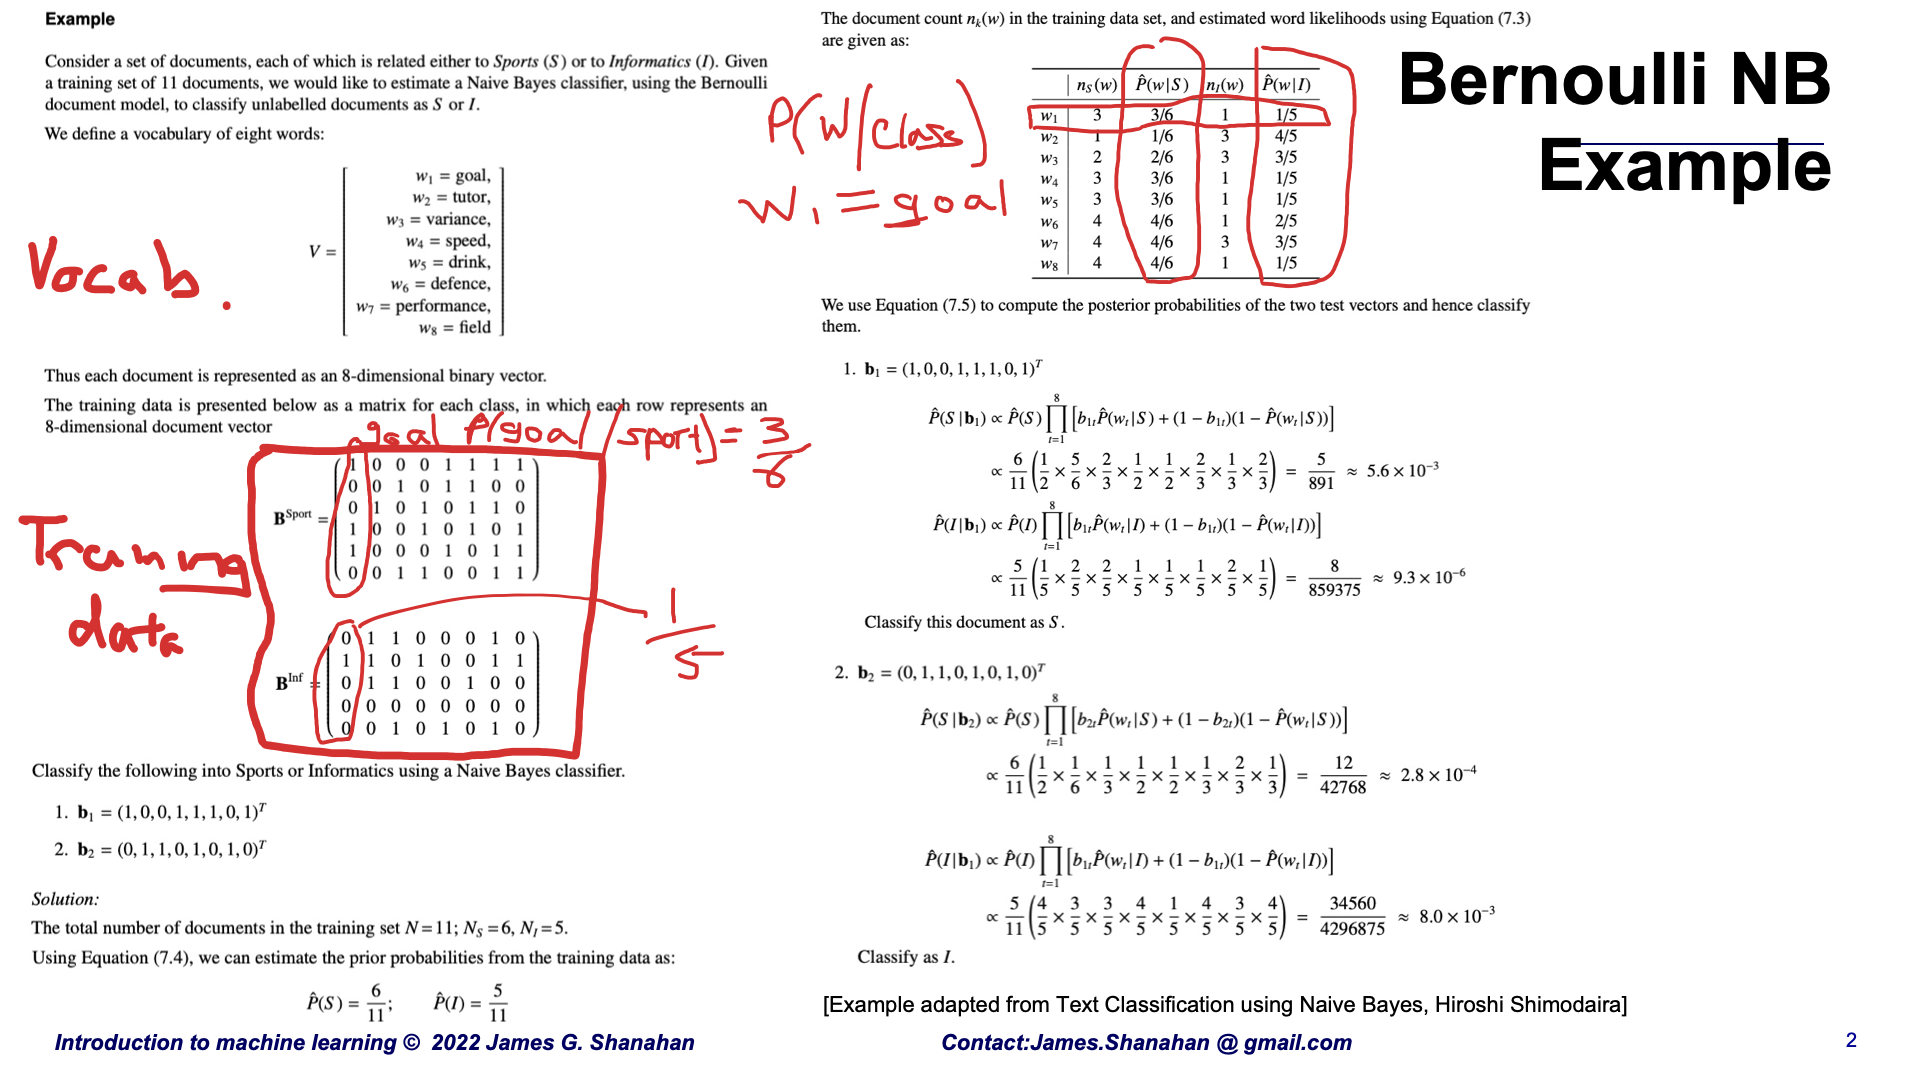

### Modeling continous variables via the Gaussian distribution

Although naive Bayes is often presented as "just counting", the previous discussion on maximum likelihood estimation connection hopefully makes it clear that we can actually apply any model for the distribution $p(X_i \mid Y)$, and just estimate its parameters via maximum likelihood estimation.  For example (as you will also do on the homework), if $x_i$ is real-valued $p(X_i \mid Y)$ as a Gaussian

\begin{equation}
p(X_i = x_i \mid Y =y) = \mathcal{N}(x_i;\mu_y \sigma_y^2)
\end{equation}

where $\mu_y$ and $\sigma_y^2$ are the parameters of the distribution.  Again, following the maximum likelihood formulation, we can estimate these parameters as

\begin{equation}
\mu_y = \frac{\sum_{j=1}^m x_i^{(j)} \mathrm{1}\{y^{(j)} = y\}}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\}}, \;\; 
\sigma^2_y = \frac{\sum_{j=1}^m (x_i^{(j)}-\mu_y)^2 \mathrm{1}\{y^{(j)} = y\}}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\}}
\end{equation}

which again are just the standard Gaussian MLE estimates except restricted to just those cases where $y^{(j)} = y$.


## What has Naive Bayes got to do with optimization theory? [Optional]

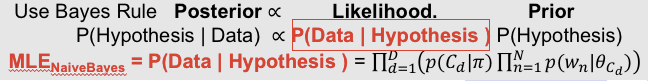

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of a probability distribution by maximizing a likelihood function , so that under the assumed statistical model  the observed data is most probable. The point in the parameter space  that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible, and as such the method has become a dominant means of statistical inference. 

If the likelihood function is differentiable , the derivative test  for determining maxima can be applied. YAY! In some cases, the first-order conditions of the likelihood function can be solved explicitly;

* For instance, in the case of Naive Bayes,  Maximum-likelihood training can be done by evaluating a closed-form expression  which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.
* Ordinary least squares estimator (MSE) maximizes the likelihood of the linear regression model.
* Logistic regression and deep learning frameworks for classification also fall under the maximum likelihood family (more that in next weeks module).
Under most circumstances, however, numerical methods will be necessary to find the maximum of the likelihood function.

From the vantage point of Bayesian inference , MLE is a special case of maximum a posteriori estimation  (MAP) that assumes a uniform  prior distribution  of the parameters. In frequentist inference , MLE is a special case of an extremum estimator , with the objective function being the likelihood.

Naive Bayes is a simple but important probabilistic model. The Naive Bayes learning algorithm is based on a maximum-likelihood estimation. The derivation of maximum-likelihood (ML) estimates for the Naive Bayes
model, in the simple case where the underlying labels are observed in the training data.

We begin with a Maximum likelihood objective function for Naive Bayes which looks like this: 

$
p(\mathcal{D}|\theta_{1:C},\pi)=\displaystyle\prod_{d=1}^{D}\Big(p(c_d|\pi)\displaystyle\prod_{n=1}^{N}p(w_n|\theta_{cd})\Big)$

$\qquad\qquad\;\,=\displaystyle\prod_{d=1}^{D}\displaystyle\prod_{c=1}^{C}\Big(\pi_c\displaystyle\prod_{n=1}^{N}\displaystyle\prod_{v=1}^{V}\theta_{c,v}^{1(w_{d,n}=v)}\Big)^{1(c_d=c)}$

<p>We take the log of the maximum likelihood objective function for Naive Bayes so we avoid numerical precision underflow. This leads to:
$$\begin{aligned}
\mathcal{L}(\pi,\theta_{1:C};\mathcal{D})=\sum_{d=1}^D\sum_{c=1}^C1(c_d=c)\,log\,\pi_c\,+
\qquad\sum_{d=1}^D\sum_{c=1}^C\sum_{n=1}^N\sum_{v=1}^V1(c_d=c)1(w_{d,n}=v)\,log\,\theta_{c,v}
\end{aligned} $$

Then we take the derivative with respect the to the paramters of the NB model (i.e., the class priors, and the word class conditional probabilites).

$\qquad\quad\hat\pi_c=\frac{n_c}{D}$

$\qquad\hat\theta_{c,v}=\frac{n_{c,v}}{\sum_{v^\prime}n_{c,v^\prime}}$



For details see [here](https://www.dropbox.com/s/rbceyfvsv5yp2yk/0214-Princeton-MLE-for-NaiveBayes.pdf?dl=0)

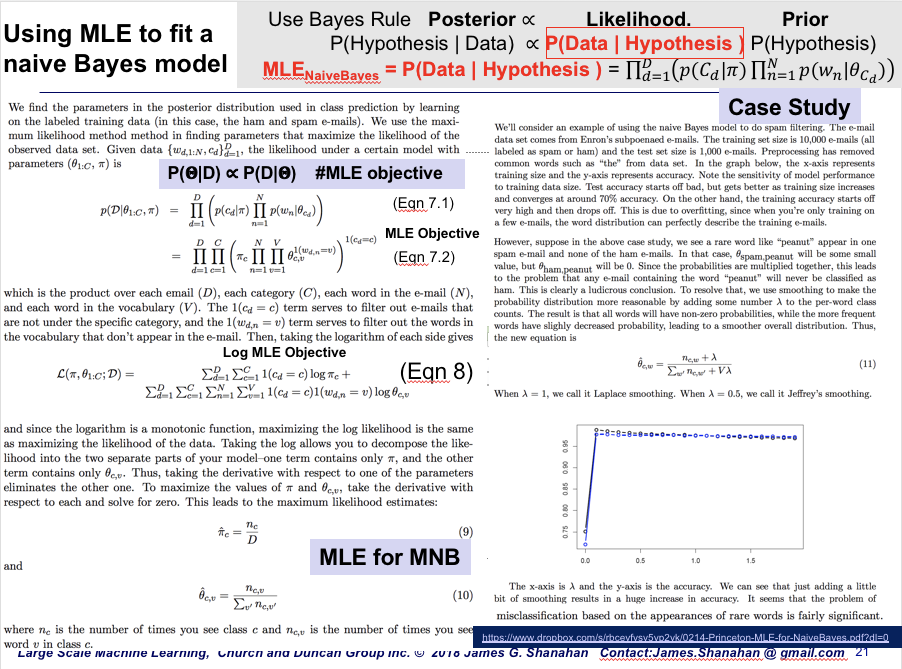

## How to build a basic model using Naive Bayes in Python?
The scikit learn package will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under the [scikit-learn library](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html):

* **Gaussian**: Here the form of class conditionals $P(X_i|C)$ corresponding to features parameters follows a normal distribution.

* **Multinomial**: It is used for input feature spaces that consist of discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

* **Bernoulli**: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

# TASK: MCQ Questions

## Question
What is the number of parameters needed to represent a Naive Bayes classifier with n
Boolean variables and a Boolean label ?

Options:
* (a) 2n + 1
* (b) n + 1
*(c) 2n
* (d) n

Ans: 

##  Train a multinomial Naive Bayes Classifier with no smoothing using D1, D2, D3, D4. 
Let's train a multinomial Naive Bayes Classifier with no smoothing using the training documents (i.e., D1, D2, D3, D4). Note each record has three tab separated fields:
* Document ID 
* class (where $1$ denotes Chinese; and $0$ denotes not Chinese)
* document content



||Document ID|class|document content|
|-----:|:-------------:|:-------------:|:-----|
|Training|D1|1|Chinese Beijing Chinese|
||D2|1|Chinese Chinese Shanghai|
||D3|1|Chinese Macao|
||D4|0|Tokyo Japan Chinese|
|Test|D5|?|Chinese Chinese Chinese Tokyo Japan|

The word class conditionals, $Pr(word|Class)$, are given in the following table. Please verify them. 


|word      | Pr(word	&#124;Class==0) | Pr(word&#124;Class==1)  |
| ------------- |:-------------:| -----:|
| Chinese     | 1/3 |5/8|
| Beijing     | 0   |   1/8|
| Shanghai  | 0      |    1/8 |
| Macao     | 0    |    1/8 |
| Tokyo |1/3     |    0 |
| Japan | 1/3   |    0 |

### QUIZ: Calculate the posterior probabilities for D5 given an unsmoothed MNB model

```#-------D5 is a Test document 
D5		Chinese Chinese	Chinese Tokyo Japan
```
What is the class of D5?  What is the posterior probabilities of D5 (Pr(Class=0|D5) versus Pr(Class=1|D5)?

In [2]:
#.  P(c1)      * P(Chinese|c1) *  P(Chinese|c1) *   P(Chinese|c1) *  P(Tokyo|c1) * P(Japan|c1)
c1 = ((5/8)*(5/8)*(5/8)*(0)*(0)) * (3/4)
c0 = ((1/3)*(1/3)*(1/3)*(1/3)*(1/3))*(1/4)

In [3]:
c1  #get 0

0.0

In [4]:
c0 # unnormalized probability

0.0010288065843621398

In [5]:
c1/(c1+c0)

0.0

In [9]:
import numpy as np
np.argmax([c0,c1])
print(100* c1/(c1+c0))
print(100* c0/(c1+c0))
print(f"Pr(Chinese    |D5): {100* c1/(c1+c0):7.4}%") 
print(f"Pr(Not Chinese|D5): {100* c0/(c1+c0):7.4}%") 

68.97586117634674
31.024138823653264
Pr(Chinese    |D5):   68.98%
Pr(Not Chinese|D5):   31.02%


## QUIZ: posterior probabilities for D5 given a smoothed multinomial Naive Bayes Classifier model


||Document ID|class|document content|
|-----:|:-------------:|:-------------:|:-----|
|Training|D1|1|Chinese Beijing Chinese|
||D2|1|Chinese Chinese Shanghai|
||D3|1|Chinese Macao|
||D4|0|Tokyo Japan Chinese|
|Test|D5|?|Chinese Chinese Chinese Tokyo Japan|

Train a smoothed multinomial Naive Bayes Classifier with laplace smoothing (plus one smoothing). Assume $D5$ is as follows:


```Chinese Chinese	Chinese Tokyo Japan```

What is the class of D5?  What is the posterior probabilities of D5 (Pr(Class=0|D5) versus Pr(Class=1|D5)?

|word        | Pr(Word &#124;Class=0)           | Pr(Word&#124;Class=1)  |
| ------------- |:-------------:| -----:|
| Chinese     | (1+1)/(3+6) |(5+1)/(8+6)|
| Beijing     |(0+1)/(3+6)  |   (1+1)/(8+6)|
| Shanghai  | (0+1)/(3+6)     |    (1+1)/(8+6) |
| Macao     | (0+1)/(3+6)   |    (1+1)/(8+6) |
| Tokyo |(1+1)/(3+6)    |   (0+1)/(8+6) |
| Japan | (1+1)/(3+6)  |    (0+1)/(8+6) |

In [10]:

#.   Pr(Chinese|C) * Pr(Chinese|)  * Pr(Chinese|C) * Pr(Tokyo|C)   * Pr(Japan|C)  * Pr(Chinese)
c1 = ((5+1)/(8+6))*((5+1)/(8+6))*((5+1)/(8+6))*((0+1)/(8+6))*((0+1)/(8+6)*(3/4))  # Chinese numerator
c0 = ((1+1)/(3+6))*((1+1)/(3+6))*((1+1)/(3+6))*((1+1)/(3+6))*((1+1)/(3+6))*(1/4)   # NOT Chinese numerator

In [11]:
import numpy as np
np.argmax([c0,c1])
print(100* c1/(c1+c0))
print(100* c0/(c1+c0))
print(f"Pr(Chinese    |D5): {100* c1/(c1+c0):7.4}%") 
print(f"Pr(Not Chinese|D5): {100* c0/(c1+c0):7.4}%") 

68.97586117634674
31.024138823653264
Pr(Chinese    |D5):   68.98%
Pr(Not Chinese|D5):   31.02%


## QUIZ: posterior probabilities for D5 given a unsmoothed Bernouill Naive Bayes Classifier model

```#-------D5 is a Test document 
D5		Chinese Chinese	Chinese Tokyo Japan
```
What is the class of D5 using this model?  What is the posterior probabilities of D5 (Pr(Class=0|D5) versus Pr(Class=1|D5)?

||Document ID|class|document content|
|-----:|:-------------:|:-------------:|:-----|
|Training|D1|1|Chinese Beijing Chinese|
||D2|1|Chinese Chinese Shanghai|
||D3|1|Chinese Macao|
||D4|0|Tokyo Japan Chinese|
|Test|D5|?|Chinese Chinese Chinese Tokyo Japan|

|word        |$n_1$(w)| Pr(Word &#124;Class=1)           |$n_0$(w)| Pr(Word&#124;Class=0)  |
| -------------|----- |:-------------:|-----| -----:|
| Chinese     |5| 3/3 |1|1/1|
| Beijing     |1|1/3  |0|   0/1|
| Shanghai  |1| 1/3     |0|    0/1 |
| Macao     |1| 1/3   |0|    0/1|
| Tokyo |0|0/3   |1|   1/1 |
| Japan |0| 0/3  |1|    1/1 |

Example:<br>
c1 = Pr(Chinese) * ((1*((3)/(3)) + 0*(1-(3)/(3))) * (0*((1)/(3)) + 1*(1-(1)/(3))) * (0*((1)/(3)) + 1*(1-(1)/(3))) * (0*((1)/(3)) + 1*(1-(1)/(3))) * (1*((0)/(3)) + 0*(1-(0)/(3))) * (1*((0)/(3)) + 0*(1-(0)/(3))))

In [17]:
c1 = ((3/4)*(3/3)*(0/3)*(0/3)*(1-(1/3))*(1-(1/3))*(1-(1/3)))
c0 = ((1/4) * (1/1) * (1/1) * (1/1) * (1-(0/1)) * (1-(0/1)) *(1-(0/1)))

In [18]:
c1

0.0

In [19]:
c0

0.25

In [20]:
import numpy as np
np.argmax([c0,c1])
print(100* c1/(c1+c0))
print(100* c0/(c1+c0))
print(f"Pr(Chinese    |D5): {100* c1/(c1+c0)}%") 
print(f"Pr(Not Chinese|D5): {100* c0/(c1+c0)}%") 

0.0
100.0
Pr(Chinese    |D5): 0.0%
Pr(Not Chinese|D5): 100.0%


## QUIZ: posterior probabilities for D5 given a `smoothed` Bernouill Naive Bayes Classifier mode 

```#-------D5 is a Test document 
D5		Chinese Chinese	Chinese Tokyo Japan
```
What is the class of D5 using this model?  What is the posterior probabilities of D5 (Pr(Class=0|D5) versus Pr(Class=1|D5)?

||Document ID|class|document content|
|-----:|:-------------:|:-------------:|:-----|
|Training|D1|1|Chinese Beijing Chinese|
||D2|1|Chinese Chinese Shanghai|
||D3|1|Chinese Macao|
||D4|0|Tokyo Japan Chinese|
|Test|D5|?|Chinese Chinese Chinese Tokyo Japan|

|word        |$n_1$(w)| Pr(Word &#124;Class=1)           |$n_0$(w)| Pr(Word&#124;Class=0)  |
| -------------|----- |:-------------:|-----| -----:|
| Chinese     |5| (3+1)/(3+2) |1|(1+1)/(1+2)|
| Beijing     |1|(1+1)/(3+2)  |0|   (0+1)/(1+2)|
| Shanghai  |1| ...     |0|    ... |
| Macao     |1| ...   |0|    ...|
| Tokyo |0|...   |1|   ... |
| Japan |0| ...  |1|    ... |

In [21]:
c1 = ((3/4) * ((3+1)/(3+2)) * ((0+1)/(3+2)) * ((0+1)/(3+2)) * (1 - ((1+1)/(3+2))) * (1 - ((1+1)/(3+2))) * (1 - ((1+1)/(3+2))))
c0 = ((1/4) * ((1+1)/(1+2)) * ((1+1)/(1+2)) * ((1+1)/(1+2)) * (1 - ((0+1)/(1+2))) * (1 - ((0+1)/(1+2))) * (1 - ((0+1)/(1+2))))

In [22]:
c1

0.005184000000000001

In [23]:
c0

0.02194787379972566

In [24]:
import numpy as np
np.argmax([c0,c1])
print(100* c1/(c1+c0))
print(100* c0/(c1+c0))
print(f"Pr(Chinese    |D5): {100* c1/(c1+c0)}%") 
print(f"Pr(Not Chinese|D5): {100* c0/(c1+c0)}%") 

19.106678876165265
80.89332112383474
Pr(Chinese    |D5): 19.106678876165265%
Pr(Not Chinese|D5): 80.89332112383474%


## SPAM versus HAM

In this section learn a multinomial Naive Bayes model using all the training data . Please use unigrams features (i.e., single words, like "very", "bad").  You would then learn the Pr(bad | SPAM) and Pr(bad | ham).  Note: please do not use any higher order features such as bigrams (e.g., "very bad"). 

As part of preprocessing the training and test data, please lowercase all words and replace non-alphabetical characters with spaces. As a result, a word is a white space delimited set of alphabetical characters (one or more characters). E.g., "This is AWESOME!!" would yield three words: this; is; awesome.

Given the following  training corpus of documents for a two Class problem: ham versus spam.

Training Data

|Document ID|class|document content|
|:-------------:|:-------------:|:-----|
|d1|ham|good|
|d2|SPAM|very good|
|d3|SPAM|good bad|
|d4|ham|very bad|
|d5|SPAM|very bad very good|

and a test data set consisting of a single test case:

Test Data​

|Document ID|class|document content|
|:-------------:|:-------------:|:-----|
|d6|??|good bad very|



TASK: Learn a multinomial Naive Bayes model with Laplace (plus one) smoothing using all the training data. 

Given a test document d6 calculate the posterior probability for ham using the learnt model .

* Pr(HAM | d6) = ?? %     [HAM]

Recall at a high level the posterior probability of, say, Pr(HAM|d6) is a follows:

* Pr(HAM|d6) = Pr(d6|HAM)/( Pr(d6|HAM) + Pr(d6|SPAM)) 

where Pr(HAM|d6) and Pr(SPAM|d6) can be calculated as follows:  
$$
\begin{aligned} 
p(C_k \mid x_1, \dots, x_n)
&=\frac{ p( x_1, \dots, x_n\mid C_k)p(C_k) }{p( x_1, \dots, x_n)}\\
&=\frac{  \prod_{i=1}^n p(x_i \mid C_k)p(C_k) }{p( x_1, \dots, x_n)}
\end{aligned}
$$

where $x_1, \dots, x_n$  are the words in d6, and $C_k$ is the class label (HAM or SPAM).
$$
\begin{aligned} 
p(Ham \mid good, bad, very)
&=\frac{  p(Ham)\prod_{i=1}^3 p(w_i \mid Ham) }{p( good, bad, ham)}\\
&=\frac{  p(Ham)\prod_{i=1}^3 p(w_i \mid Ham) }{(p(Ham) \prod_{i=1}^3 p(w_i \mid Ham)) +(p(SPAM) \prod_{i=1}^3 p(w_i \mid SPAM))}
\end{aligned}
$$
Here $w_i$ will be the ith word d6. 

Sometimes the above equations are simplified for the purposes of classification as follows:

$$
\begin{aligned}
p(C_k \mid x_1, \dots, x_n)
& \varpropto p(C_k, x_1, \dots, x_n) \\
& \varpropto p(C_k) \ p(x_1 \mid C_k) \ p(x_2 \mid C_k) \ p(x_3 \mid C_k) \ \cdots \\
& \varpropto p(C_k) \prod_{i=1}^n p(x_i \mid C_k) \,.
\end{aligned}
$$


Please adapt the following code base and fill in the missing code to compute the needed probabilities:

You can calculate these probabilities by hand and you can verify your calculations by running the code given below.

In [25]:

import pandas as pd
import numpy as np

vocabulary = ["bad", "good", "very"]

# Document by term matrix
doc_per_term= np.array([[0, 1, 0 ],[0, 1, 1],[1, 1, 0],[1, 0, 1],[1, 1, 2]])
# y_train
# 0 for Ham and 1 for spam
class_per_doc= np.array([0,1,1,0,1])
display(pd.DataFrame(np.c_[class_per_doc, doc_per_term], index = ["d1", "d2","d3", "d4", "d5"],columns = ["Class"]+ vocabulary))

## Learn the Naïve Bayes Classification
##
##
model_priors = np.bincount(class_per_doc)/ len(class_per_doc)
print(f"model_priors: {model_priors}")

#=========================================================#
# Place your code between here                            #
# Please adapt the following code to accomplish this task #
#
# Calculate Pr(w_i|ham) aka ham  class conditionals
print (doc_per_term[class_per_doc==0,:])
model_data_given_ham= (np.sum(doc_per_term[class_per_doc==0,:],axis=0)+1)/(np.sum(doc_per_term[class_per_doc==0,:]) +len(vocabulary))
print(f"Pr(w_i|ham):  {np.round(model_data_given_ham, 3)}")

# Calculate Pr(w_i|spam) aka SPAM class conditionals
model_data_given_spam= (np.sum(doc_per_term[class_per_doc==1,:],axis=0)+1)/(np.sum(doc_per_term[class_per_doc==1,:]) +len(vocabulary))
print(f"Pr(w_i|spam):  {np.round(model_data_given_spam, 3)}")
#                                                          #
# When asked to copy/paste your code in the homework       # 
# submission quiz, only submit the code you added          #
# (or modified) between the comment blocks                 #
#==========================================================#



# Test document terms are: 
# bad, good, very
d6 = [1, 1, 1] #TEST DOCUMENT
display(pd.DataFrame([d6], index = ["d3"], columns = vocabulary))

## Naïve Bayes Classification
## Likelihood
## Applying the Unigram Language Model
# Calculate Posterior Probabilities using the learnt Naive Bayes Model
#
print(f"likelihood Pr(d6|ham): {np.prod(np.power(model_data_given_ham, d6))}")
print(f"likelihood Pr(d6|SPAM): {np.prod(np.power(model_data_given_spam, d6))}")

pr_ham = np.prod(np.power(model_data_given_ham, d6)) * model_priors[0]
pr_spam = np.prod(np.power(model_data_given_spam, d6))* model_priors[1]
print(f"unnormalized Pr(D6|ham)*Pr(ham) is : {pr_ham:7.5f}")
print(f"unnormalized Pr(D6|SPAM)*Pr(SPAM) is : {pr_spam:7.5f}")

print(f"Posterior Probabilities in % is: Pr(Ham|D6) is : {100*pr_ham/(pr_spam+pr_ham):7.0f}")
print(f"Posterior Probabilities in % is: Pr(SPAM|D6) is : {100*pr_spam/(pr_spam+pr_ham):7.0f}")


Class  bad  good  very
d1      0    0     1     0
d2      1    0     1     1
d3      1    1     1     0
d4      0    1     0     1
d5      1    1     1     2

model_priors: [0.4 0.6]
[[0 1 0]
 [1 0 1]]
Pr(w_i|ham):  [0.333 0.333 0.333]
Pr(w_i|spam):  [0.273 0.364 0.364]


bad  good  very
d3    1     1     1

likelihood Pr(d6|ham): 0.037037037037037035
likelihood Pr(d6|SPAM): 0.03606311044327573
unnormalized Pr(D6|ham)*Pr(ham) is : 0.01481
unnormalized Pr(D6|SPAM)*Pr(SPAM) is : 0.02164
Posterior Probabilities in % is: Pr(Ham|D6) is :      41
Posterior Probabilities in % is: Pr(SPAM|D6) is :      59


## negative log likelihood (optional question)

Calculate the negative log likelihood of the testing data d6 for spam and ham for the laplace =1  MLE smoothed multinomial Naive Bayes Model.

In [ ]:
#=========================================================#
# Place your code between here                            #
#

print(f"negative Log likelihood Pr(d6|ham) given the MLE model is: {...}")
print(f"negative Log likelihood Pr(d6|SPAM) given the MLE model is: {...}")

#                                                          #
# When asked to copy/paste your code in the homework       # 
# submission quiz, only submit the code you added          #
# (or modified) between the comment blocks                 #
#==========================================================#

# CIFAR10

DOWNLOAD DATA FROM [HERE](http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) AND PUT IT TO THE DATA FOLDER

The [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. Such a situation is called **multiclass** classification in oppose to **multilabel** classification when each example may have multiple label.

One can see state-of-the-art results [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

In [32]:
import _pickle as cPickle
import tarfile

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Set style for plotting

In [33]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

Fix random seed for reproducibility

In [34]:
np.random.seed(42)

## Data

Unarchive data

In [38]:
tar = tarfile.open("data/cifar-10-python.tar.gz", "r:gz")
tar.extractall("data")
tar.close()

## Reading

Data are stored as a memory dump with python $\text{dict}$ object. It was created using **pickle** function. To read one should "unpickle" it.

In [39]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding="latin1")
    fo.close()
    return dict

Data are also splitted in to 5 pieces for conveniece. Let's read them all and concatenate

In [40]:
for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)

Read test data. In this dataset train/test split is provided by authors of the dataset to be able to consistently evaluate solutions

In [41]:
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

Read meta-information file with the names of the classes

In [42]:
classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]

## Pre-processing

We have too many data

In [43]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 50000
Test size: 10000


Let's take only 10% of them to train faster

In [44]:
subsample_rate = 0.1
np.random.seed(42)

We want to preserve the same quantity ratio between classes. In python such an option is called **stratification**. Let's randomly (with fixed initial seed for the sake of reproducibility) divide part of train data

In [45]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)

In [46]:
X_train.shape

(5000, 3072)

The same for test

In [47]:
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

Indeed, we preserved the number of objects of each class

In [48]:
unique_train = np.unique(y_train, return_counts=True)
list(zip(np.array(classes)[unique_train[0]], unique_train[1]))

[('airplane', 500),
 ('automobile', 500),
 ('bird', 500),
 ('cat', 500),
 ('deer', 500),
 ('dog', 500),
 ('frog', 500),
 ('horse', 500),
 ('ship', 500),
 ('truck', 500)]

## Visualization

For now each object has the following shape

In [49]:
X_train[0].shape

(3072,)

$3072 = 32 \times 32 \times 3$ where $32 \times 32$ is the size of the image in pixels and $3$ is the number of channels (RGB)

To show this array as an image let's reshape it in the needed from with the shape $(32, 32, 1)$

In [50]:
def show_pic(x):
    plt.imshow(x.reshape((3, 32, 32)).transpose(1, 2, 0).astype("uint8"))
    plt.axis("off")

Draw one pic from each class

In [51]:
classes_idx_examples = np.zeros(10, dtype=np.int)
for i in range(10):
    classes_idx_examples[i] = np.where(y_train == i)[0][0]

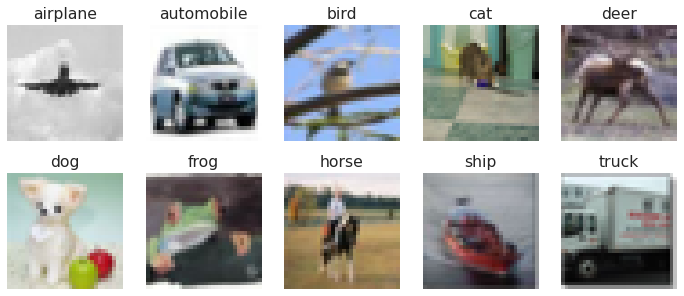

In [52]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    show_pic(X_train[classes_idx_examples[i]])
    plt.title(classes[i])

# Image classifier via a Gaussian Naive Bayes model

Let's use Sklearn to build benchmark proabilistic classifiers.

Also one should **always** track the results of the experiments to be able to compare different approaches. Let's create pandas $\text{DataFrame}$ for this purpose.

**TASK: Run the code in this section, and report the test accuracy for Gaussian Naive Bayes and Multinomial Logistic Regression**

In [53]:
# Simple table to track experimental results
results = pd.DataFrame(columns=["Model", "Test Accuracy"])

For now it is empty, but will be filled in later

In [54]:
results

Empty DataFrame
Columns: [Model, Test Accuracy]
Index: []

Before predicting, let's standardize the data first

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Gaussian Naive Bayes

Let's train our first probalistic image classifer, namely a Gaussian Naive Bayes model. Please check this link for the SKLearn documentaion page on Gaussian Naive Bayes:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

from sklearn.naive_bayes import GaussianNB

%matplotlib inline

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_test = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
results.loc[len(results)] = ["Gaussian Naive Bayes Sklearn", np.round(acc, 3)]
results

Model  Test Accuracy
0  Gaussian Naive Bayes Sklearn          0.301

##  Multinomial Logistic Regression

Let's build our next probalistic classifier, namely Multinomial Logistic Regression based classifier. Logistic Regression will be covered in great detail in the next lecture. For completeness we provide some background on Logistic Regression, however, you are not required to read or understand the following details at this time. 

Sklearn implementation of LogRegression implies mandatory usage of regularization (it almost always works better with it preventing overfitting). We want to explore very basic LogRegression model thus to "disable" regularization we need to reduce its impact to almost zero. It can be done by setting regularization constant $\lambda$ to very small value (in sklearn we define inverse regularization constant $C = 1 / \lambda$ thus we need to make it big)

Here we use Sklearn $\text{LogisticRegression}$ with few options:
* $\text{multi_class} = \text{"multinomial"} -$we want to build softmax classifier (there are other ways of dealing with multiclass setting for Logistic Regression)
* $\text{C} = 10^6-$ for now we don't want to use regularization; $\text{C}$ is the inverse regularization constant which is $\text{C} = \frac{1}{\lambda}$; thus we should make $\text{C}$ big to turn off regulazrization
* $\text{solver} = \text{sag} -$ optimization algorithm to use; Stochastic Average Gradient. Stochastic Gradient Descent method gitters massively. This is due to the not very good approximation of gradient (only by one example). To neglect this error one can simply average gradient across last few steps; that is exectly what $\text{sag}$ does
* $\text{max_iter} = 15 -$ the number of passes over the training data (aka epochs)

In [57]:
np.random.seed(42)
model_lr_sklearn = LogisticRegression(multi_class="multinomial", C=1e6, solver="sag", max_iter=15)
model_lr_sklearn.fit(X_train, y_train)
##Prediciton
y_pred_test = model_lr_sklearn.predict(X_test)
##Accuracy
y_pred_test = model_lr_sklearn.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
results.loc[len(results)] = ["LR Sklearn", np.round(acc, 3)]
results

Model  Test Accuracy
0  Gaussian Naive Bayes Sklearn          0.301
1                    LR Sklearn          0.365

Keeping table of results up-to-date

# The Great Race

## Background example: Part 1: Pima Diabetes classification

In this section and related subsections, please review the content and run the code cells to see what is the best model for this Pima Indians  diabetes onset classification problem. 

It is important to compare the performance of multiple different machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple different machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and different
algorithms to compare. After completing this lesson you will know:

1. How to formulate an experiment to directly compare machine learning algorithms.
2. A reusable template for evaluating the performance of multiple algorithms on one dataset.
3. How to report and visualize the results when comparing algorithm performance.

In the example below six different classification
algorithms (some of which you will recognize!) are compared on a single dataset:

*  Logistic Regression
*  Linear Discriminant Analysis
*  k-Nearest Neighbors
*  Classification and Regression Trees
*  Naive Bayes
* Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross-validation procedure is used to
evaluate each algorithm, importantly configured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

0  \
mean_fit_time                           0.009738   
std_fit_time                            0.014976   
mean_score_time                          0.00047   
std_score_time                          0.000057   
param_clf                   LogisticRegression()   
params             {'clf': LogisticRegression()}   
split0_test_score                       0.688312   
split1_test_score                       0.831169   
split2_test_score                       0.766234   
split3_test_score                       0.701299   
split4_test_score                       0.779221   
split5_test_score                       0.792208   
split6_test_score                       0.844156   
split7_test_score                       0.831169   
split8_test_score                       0.763158   
split9_test_score                       0.802632   
mean_test_score                         0.779956   
std_test_score                          0.050088   
rank_test_score                                1   

                                                       1  \
mean_fit_time                                   0.012053   
std_fit_time                                    0.026494   
mean_score_time                                 0.000622   
std_score_time                                  0.000121   
param_clf                   LinearDiscriminantAnalysis()   
params             {'clf': LinearDiscriminantAnalysis()}   
split0_test_score                               0.701299   
split1_test_score                               0.831169   
split2_test_score                               0.753247   
split3_test_score                               0.675325   
split4_test_score                               0.779221   
split5_test_score                               0.766234   
split6_test_score                               0.844156   
split7_test_score                               0.818182   
split8_test_score                               0.763158   
split9_test_score                               0.802632   
mean_test_score                                 0.773462   
std_test_score                                  0.051592   
rank_test_score                                        2   

                                                 2  \
mean_fit_time                             0.001841   
std_fit_time                              0.000151   
mean_score_time                           0.003905   
std_score_time                            0.000284   
param_clf                   KNeighborsClassifier()   
params             {'clf': KNeighborsClassifier()}   
split0_test_score                          0.61039   
split1_test_score                         0.844156   
split2_test_score                         0.701299   
split3_test_score                         0.714286   
split4_test_score                         0.766234   
split5_test_score                          0.74026   
split6_test_score                          0.74026   
split7_test_score                         0.883117   
split8_test_score                         0.710526   
split9_test_score                         0.723684   
mean_test_score                           0.743421   
std_test_score                            0.072108   
rank_test_score                                  5   

                                                   3                      4  \
mean_fit_time                               0.004048               0.001624   
std_fit_time                                0.000135               0.000144   
mean_score_time                             0.000551               0.000557   
std_score_time                              0.000045               0.000045   
param_clf                   DecisionTreeClassifier()           GaussianNB()   
params             {'clf': DecisionTreeClassifier()}  {'clf': GaussianNB()}   
split0_test_score                           0.662338               0.675325   
split1_test_score                           0.779221               0.805195   
split2_test_s

0         1         2         3         4         5
split0_test_score  0.688312  0.701299   0.61039  0.662338  0.675325  0.688312
split1_test_score  0.831169  0.831169  0.844156  0.779221  0.805195  0.844156
split2_test_score  0.766234  0.753247  0.701299  0.688312  0.753247   0.74026
split3_test_score  0.701299  0.675325  0.714286  0.584416  0.714286  0.675325
split4_test_score  0.779221  0.779221  0.766234  0.688312  0.727273  0.779221
split5_test_score  0.792208  0.766234   0.74026  0.727273  0.766234  0.766234
split6_test_score  0.844156  0.844156   0.74026  0.753247  0.805195  0.805195
split7_test_score  0.831169  0.818182  0.883117  0.779221  0.818182  0.844156
split8_test_score  0.763158  0.763158  0.710526  0.631579  0.736842  0.710526
split9_test_score  0.802632  0.802632  0.723684  0.697368      0.75  0.789474

--------------------------------------------------


Model mean_acc std_acc
0    LR     0.78    0.05
1   LDA    0.773   0.052
2   KNN    0.743   0.072
3  CART    0.699    0.06
4   GNB    0.755   0.043
5   SVM    0.764   0.057

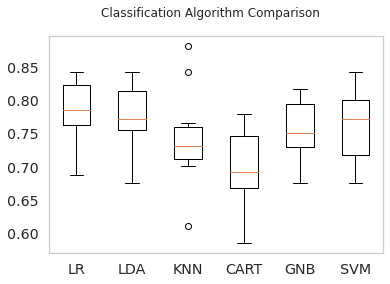




------------------------------------------------------------
Best pipeline is Pipeline(steps=[('scale', StandardScaler()), ('clf', LogisticRegression())])
Best model is {'clf': LogisticRegression()}
test_acc on heldout test set by best pipeline is: 0.734





In [58]:
# Compare Algorithms

import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# load dataset
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size = 0.2, random_state=42)

# Create a pipeline
clf_pipe = Pipeline([('scale', StandardScaler()), ('clf', None)]) # Placeholder Estimator
    
# Candidate learning estimators
estimators = [{'clf': [LogisticRegression()]},
                {'clf': [LinearDiscriminantAnalysis()]},
                {'clf': [KNeighborsClassifier()]},
                {'clf': [DecisionTreeClassifier()]},
                {'clf': [GaussianNB()]},
                {'clf': [SVC()]},
               ]
ml_name = ['LR','LDA','KNN','CART','GNB','SVM']

clf_gridsearch = GridSearchCV(clf_pipe, param_grid = estimators, cv = 10, scoring='accuracy')
clf_gridsearch.fit(X, Y)

results_df = pd.DataFrame(clf_gridsearch.cv_results_)
results_df = results_df.T
display(results_df)
cv_by_model_test_scores=results_df.iloc[6:16, 0:len(ml_name)]
display(cv_by_model_test_scores)
print("-"*50)
display(pd.DataFrame(np.c_[ml_name, np.round(np.mean(cv_by_model_test_scores, 0), 3),
                           np.round(np.std(cv_by_model_test_scores, 0), 3)], 
                     columns=["Model", "mean_acc", "std_acc"]))
   
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(cv_by_model_test_scores)
ax.set_xticklabels(ml_name)
pyplot.grid()
pyplot.show()

clf_pipeline = clf_gridsearch.best_estimator_
print("\n\n")
print("-"*60)
print(f"Best pipeline is {clf_pipeline}")
print(f"Best model is {clf_gridsearch.best_params_}")
y_pred = clf_pipeline.predict(X_test)
print(f"test_acc on heldout test set by best pipeline is: {accuracy_score(y_pred, y_test):.3f}")
print("\n\n")


Above we produced a box and whisker plot showing the spread of the accuracy scores
across each cross-validation fold for each algorithm.

From these results, it would suggest that both logistic regression and support vector machine classifies are perhaps worthy of further study on this problem.

## Task: CIFAR10 Great Race 
Repeat the above RACE for the CIFAR10 dataset and draw some conclusions. Complete the code below.

### Reload CIFAR-10 dataset

In [59]:
import _pickle as cPickle
import tarfile

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding="latin1")
    fo.close()
    return dict

for b in range(1, 6):
    data_batch = unpickle("data/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)
        
data_batch = unpickle("data/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

classes = unpickle("data/cifar-10-batches-py/batches.meta")["label_names"]
np.random.seed(42)
subsample_rate = 0.02

#downsample training data
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
#downsample testing data
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

### Run Great Race on CIFAR-10 dataset

0  \
mean_fit_time                          13.920595   
std_fit_time                             1.85294   
mean_score_time                         0.034626   
std_score_time                           0.02429   
param_clf                   LogisticRegression()   
params             {'clf': LogisticRegression()}   
split0_test_score                           0.24   
split1_test_score                           0.25   
split2_test_score                           0.29   
split3_test_score                           0.27   
split4_test_score                           0.32   
split5_test_score                           0.28   
split6_test_score                           0.26   
split7_test_score                            0.3   
split8_test_score                            0.3   
split9_test_score                           0.23   
mean_test_score                            0.274   
std_test_score                          0.027641   
rank_test_score                                4   

                                                       1  \
mean_fit_time                                  12.326676   
std_fit_time                                    2.869252   
mean_score_time                                 0.007173   
std_score_time                                  0.002612   
param_clf                   LinearDiscriminantAnalysis()   
params             {'clf': LinearDiscriminantAnalysis()}   
split0_test_score                                    0.2   
split1_test_score                                   0.19   
split2_test_score                                   0.15   
split3_test_score                                   0.23   
split4_test_score                                    0.2   
split5_test_score                                   0.19   
split6_test_score                                   0.17   
split7_test_score                                   0.17   
split8_test_score                                   0.12   
split9_test_score                                   0.16   
mean_test_score                                    0.178   
std_test_score                                  0.029257   
rank_test_score                                        7   

                                                 2  \
mean_fit_time                             0.097387   
std_fit_time                              0.018006   
mean_score_time                           0.077394   
std_score_time                            0.045608   
param_clf                   KNeighborsClassifier()   
params             {'clf': KNeighborsClassifier()}   
split0_test_score                             0.28   
split1_test_score                             0.23   
split2_test_score                             0.26   
split3_test_score                             0.25   
split4_test_score                             0.25   
split5_test_score                             0.26   
split6_test_score                             0.21   
split7_test_score                             0.27   
split8_test_score                             0.21   
split9_test_score                             0.29   
mean_test_score                              0.251   
std_test_score                            0.025865   
rank_test_score                                  5   

                                                   3                      4  \
mean_fit_time                               1.870843               0.063039   
std_fit_time                                 0.07343               0.006666   
mean_score_time                             0.002809               0.015415   
std_score_time                              0.000526               0.001373   
param_clf                   DecisionTreeClassifier()           GaussianNB()   
params             {'clf': DecisionTreeClassifier()}  {'clf': GaussianNB()}   
split0_test_score                               0.16                    0.3   
split1_test_score                               0.21                   0.26   
split2_test_s

0     1     2     3     4     5     6
split0_test_score  0.24   0.2  0.28  0.16   0.3  0.25  0.36
split1_test_score  0.25  0.19  0.23  0.21  0.26  0.25  0.33
split2_test_score  0.29  0.15  0.26  0.25  0.32  0.31  0.36
split3_test_score  0.27  0.23  0.25  0.14   0.4  0.34  0.37
split4_test_score  0.32   0.2  0.25  0.27   0.3  0.35  0.39
split5_test_score  0.28  0.19  0.26  0.23  0.24   0.3  0.43
split6_test_score  0.26  0.17  0.21  0.17   0.3   0.3  0.37
split7_test_score   0.3  0.17  0.27  0.25  0.36  0.34  0.43
split8_test_score   0.3  0.12  0.21  0.21  0.29  0.26  0.35
split9_test_score  0.23  0.16  0.29  0.23  0.34  0.33   0.4

--------------------------------------------------


Model mean_acc std_acc
0    LR    0.274   0.028
1   LDA    0.178   0.029
2   KNN    0.251   0.026
3  CART    0.212   0.041
4   GNB    0.311   0.044
5   MNB    0.303   0.036
6   SVM    0.379   0.031

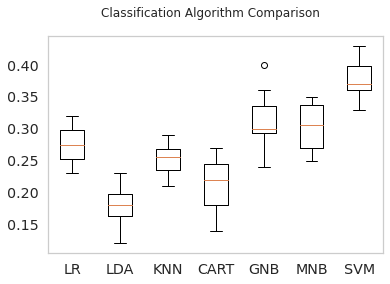




------------------------------------------------------------
Best pipeline is Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', SVC())])
Best model is {'clf': SVC()}
test_acc on heldout test set by best pipeline is: 0.405





In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Create a pipeline
# do a min-max scaling
clf_pipe = Pipeline([("scaler", MinMaxScaler()), ('clf', None)]) # Placeholder Estimator
    
# Candidate learning estimators
estimators = [{'clf': [LogisticRegression()]},
                {'clf': [LinearDiscriminantAnalysis()]},
                {'clf': [KNeighborsClassifier()]},
                {'clf': [DecisionTreeClassifier()]},
                {'clf': [GaussianNB()]},
                {'clf': [MultinomialNB()]},
                {'clf': [SVC()]},
               ]

ml_name = ['LR','LDA','KNN','CART','GNB','MNB','SVM']

# Create grid search 

#==================================================#
#               Your code starts here              #
#==================================================#
# Create grid search using the pipeline and estimators as the parametes, 
#use cv = 10 and 'accuracy' for the scoring parameter
clf_gridsearch = GridSearchCV(clf_pipe ,param_grid = estimators , cv = 10, scoring='accuracy')
#TODO:complete the gridsearch code
#clf_gridsearch = GridSearchCV...
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

ml_name = ['LR','LDA','KNN','CART','GNB','MNB','SVM']
clf_gridsearch.fit(X_train, y_train)

results_df = pd.DataFrame(clf_gridsearch.cv_results_)
results_df = results_df.T
#display(results_df)
display(results_df)
cv_by_model_test_scores=results_df.iloc[6:16, 0:len(ml_name)]
display(cv_by_model_test_scores)
print("-"*50)
display(pd.DataFrame(np.c_[ml_name, np.round(np.mean(cv_by_model_test_scores, 0), 3),
                           np.round(np.std(cv_by_model_test_scores, 0), 3)], 
                     columns=["Model", "mean_acc", "std_acc"]))
     
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(cv_by_model_test_scores)
ax.set_xticklabels(ml_name)
pyplot.grid()
pyplot.show()


clf_pipeline = clf_gridsearch.best_estimator_
print("\n\n")
print("-"*60)
print(f"Best pipeline is {clf_pipeline}")
print(f"Best model is {clf_gridsearch.best_params_}")
y_pred = clf_pipeline.predict(X_test)
print(f"test_acc on heldout test set by best pipeline is: {accuracy_score(y_pred, y_test):.3f}")
print("\n\n")

# Background: HyperParameter tuning on steroids for text data
In this section, please review and run the following subsections to get familier on how to build a multi-class classifier from text documents.  

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this section you will revisit how to tune the parameters of machine learning algorithms in Python using the scikit-learn.

Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can perform a grid search using the `GridSearchCV` class. 
In this section we will focus on setting up a pipeline for **text classifiction**, though it can be adapted to any machine learning problem.

## Sample pipeline for text feature extraction and evaluation


The dataset used in this section is the 20 newsgroups dataset which will be
automatically downloaded and then cached and reused for the document
classification example.

<PRE>
>>> from sklearn.datasets import fetch_20newsgroups
>>> newsgroups_train = fetch_20newsgroups(subset='train')

>>> from pprint import pprint
>>> pprint(list(newsgroups_train.target_names))
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
</PRE>
You can adjust the number of categories by giving their names to the dataset
loader or setting them to None to get the 20 of them.

Here is a sample output of a run on a quad-core machine::

<PRE>  Loading 20 newsgroups dataset for categories:
  ['alt.atheism', 'talk.religion.misc']
  1427 documents
  2 categories
  
  
  Performing grid search...
  pipeline: ['vect', 'tfidf', 'clf']
  parameters:
  {'clf__alpha': (1.0000000000000001e-05, 9.9999999999999995e-07),
   'clf__n_iter': (10, 50, 80),
   'clf__penalty': ('l2', 'elasticnet'),
   'tfidf__use_idf': (True, False),
   'vect__max_n': (1, 2),
   'vect__max_df': (0.5, 0.75, 1.0),
   'vect__max_features': (None, 5000, 10000, 50000)}
  done in 1737.030s

  Best score: 0.940
  Best parameters set:
      clf__alpha: 9.9999999999999995e-07
      clf__n_iter: 50
      clf__penalty: 'elasticnet'
      tfidf__use_idf: True
      vect__max_n: 2
      vect__max_df: 0.75
      vect__max_features: 50000
</PRE>

## From documents to a "document by term" frequency matrix  

Convert a set of  documents to a "document by term" frequency matrix

The following corpus: 

`corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]`

gets converted to a "document by term" frequency matrix

`array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]]
       `

where the 9 columns are labeled with the following 9 words extracted:

`['and', 'document', 'first', 'is', 'one',
      'second', 'the', 'third', 'this']`
      
By default, words of length 2 characters or more a kept as the vocabulary.

For more details see (here)[http://scikit-learn.org/stable/modules/feature_extraction.html]

In [61]:
# Let’s use the following corpus (text dataset).
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

In [62]:
#CountVectorizer implements both tokenization and occurrence counting in a single class:
from sklearn.feature_extraction.text import CountVectorizer

# Here we will tokenize and count the word occurrences of this minimalistic corpus of text documents:
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
X                              
#<4x9 sparse matrix of type '<... 'numpy.int64'>'
#    with 19 stored elements in Compressed Sparse ... format>

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [63]:
# The default configuration tokenizes the string by extracting words of at least 2 
# letters. The specific function that does this step can be requested explicitly:  
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") == (
    ['this', 'is', 'text', 'document', 'to', 'analyze'])

True

In [64]:
vectorizer.get_feature_names() == (
     ['and', 'document', 'first', 'is', 'one',
      'second', 'the', 'third', 'this'])

True

In [65]:
X.toarray()     #recover document by term frequency matrix        
#array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
#       [0, 1, 0, 1, 0, 2, 1, 0, 1],
#       [1, 0, 0, 0, 1, 0, 1, 1, 0],
#       [0, 1, 1, 1, 0, 0, 1, 0, 1]]...)
display(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()))
print(corpus)

and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         1      0   1    0       2    1      0     1
2    1         0      0   0    1       0    1      1     0
3    0         1      1   1    0       0    1      0     1

['This is the first document.', 'This is the second second document.', 'And the third one.', 'Is this the first document?']


## Text classification pipeline

Note below we model this classification problem using a multinomial Naive Bayes model 

### EDA on 20 newsgroups dataset

The 20 newsgroups dataset has 11314 training examples, 7532 test cases.


#### Training Set

In [66]:
from sklearn.datasets import fetch_20newsgroups
# Uncomment the following to do the analysis on all the categories
categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

trainData = fetch_20newsgroups(subset='train', categories=categories)
data = trainData
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()
print("Sample document Target Class", data.target_names[1], )
print("Sample document body", data.data[1], )
print(len(data.data))

Loading 20 newsgroups dataset for categories:
None
11314 documents
20 categories

Sample document Target Class comp.graphics
Sample document body From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.e

#### Test Set

In [67]:
print(categories)
testData = fetch_20newsgroups(subset='test', categories=categories)
data = testData
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()
print("Sample document Target Class [%s]"% data.target_names[1], )
print("Sample document body", data.data[1], )
print(len(data.data))

None
7532 documents
20 categories

Sample document Target Class [comp.graphics]
Sample document body From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Posting-Host: 129.89.2.33
Summary: Go ahead... swamp me.  <EEP!>

I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *know* I'll probably get a little swamped, but I can handle it.

	...I hope.

Rick Miller  <rick@ee.uwm.edu> | <ricxjo@discus.mil.wi.us>   Ricxjo Muelisto
Send a postcard, get one back! | Enposxtigu bildkarton kaj vi ricevos alion!
          RICK MILLER // 16

In [68]:
print("Number of (Train, Test) data (%d, %d)" %(len(trainData.data),  len(testData.data) ))

Number of (Train, Test) data (11314, 7532)


### Grid search over CountVectorizer and GaussianNB pipeline

In [69]:
%%time
from __future__ import print_function
import numpy as np
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB


%matplotlib inline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set 
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()


# #############################################################################
# transform a sparse vector to a dense representation
# with a simple classifier 
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return np.asarray(X.todense())
    
    
# #############################################################################
# Define a pipeline combining a text feature extractor 
# with a simple classifier 

pipeline = Pipeline([
    ('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    #('tfidf', TfidfTransformer()), #ignore for now
    ('to_dense', DenseTransformer()),
    ('clf', GaussianNB()), 
])


# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'vect__max_df': (0.5, 0.75, 1.0),
    # jgs 'vect__max_features': (None, 500, 5000, 10000, 50000),
    # jgs 'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__var_smoothing': (1e-9, 1e-7, 1e-5),
 }

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Automatically created module for IPython interactive environment
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 categories

Performing grid search...
pipeline: ['vect', 'to_dense', 'clf']
parameters:
{'clf__var_smoothing': (1e-09, 1e-07, 1e-05)}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
done in 28.847s

Best score: 0.907
Best parameters set:
	clf__var_smoothing: 1e-09
CPU times: user 1.11 s, sys: 4.25 s, total: 5.36 s
Wall time: 29.1 s


### Grid search over TF_IDF and BernoulliNB pipeline

In [70]:
%%time

from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

import warnings
warnings.simplefilter('ignore', UserWarning)

%matplotlib inline

print(__doc__)

## Display progress logs on stdout
#logging.basicConfig(level=logging.INFO,
#                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set 
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()

# #############################################################################
# Define a pipeline combining a text feature extractor 
# with a simple classifier 
pipeline = Pipeline([
    #('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    ('tfidf', TfidfVectorizer()), 
    ('clf', BernoulliNB()),  #let's use BernoulliNB() 
])


# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'vect__max_df': (0.5, 0.75, 1.0),
    # jgs 'vect__max_features': (None, 500, 5000, 10000, 50000),
    # jgs 'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'tfidf__use_idf': [True, False],
    'clf__alpha': [0.0, 0.5, 1.0],
    'clf__binarize': [None, 0.2, 0.5, 0.7, 1.0],
    'clf__fit_prior': [True, False],
 }

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Automatically created module for IPython interactive environment
Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 categories

Performing grid search...
pipeline: ['tfidf', 'clf']
parameters:
{'clf__alpha': [0.0, 0.5, 1.0],
 'clf__binarize': [None, 0.2, 0.5, 0.7, 1.0],
 'clf__fit_prior': [True, False],
 'tfidf__ngram_range': [(1, 1), (1, 2)],
 'tfidf__stop_words': [None, 'english'],
 'tfidf__use_idf': [True, False]}
Fitting 3 folds for each of 240 candidates, totalling 720 fits
done in 36.409s

Best score: 0.935
Best parameters set:
	clf__alpha: 0.0
	clf__binarize: None
	clf__fit_prior: False
	tfidf__ngram_range: (1, 2)
	tfidf__stop_words: 'english'
	tfidf__use_idf: True
CPU times: user 4.77 s, sys: 1.1 s, total: 5.88 s
Wall time: 36.7 s


## Confusion matrices
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

Let's start with an example confusion matrix for a binary classifier (though it can easily be extended to the case of more than two classes):

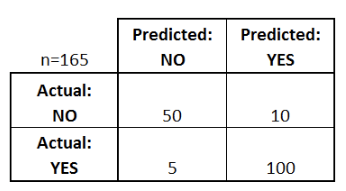


What can we learn from this matrix?

* There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.
* The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease).
* Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.
* In reality, 105 patients in the sample have the disease, and 60 patients do not.

Let's now define the most basic terms, which are whole numbers (not rates):

* true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
* true negatives (TN): We predicted no, and they don't have the disease.
* false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

I've added these terms to the confusion matrix, and also added the row and column totals:


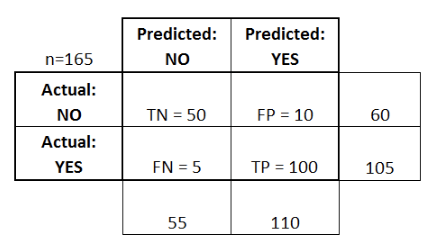
This is a list of rates that are often computed from a confusion matrix for a binary classifier:

* Accuracy: Overall, how often is the classifier correct?
  * (TP+TN)/total = (100+50)/165 = 0.91
* Misclassification Rate: Overall, how often is it wrong?
  * (FP+FN)/total = (10+5)/165 = 0.09
  * equivalent to 1 minus Accuracy
  * also known as "Error Rate"
* True Positive Rate: When it's actually yes, how often does it predict yes?
  * TP/actual yes = 100/105 = 0.95
  * also known as "Sensitivity" or "Recall"
* False Positive Rate: When it's actually no, how often does it predict yes?
  * FP/actual no = 10/60 = 0.17
  * Specificity: When it's actually no, how often does it predict no?
* TN/actual no = 50/60 = 0.83
  * equivalent to 1 minus False Positive Rate
* Precision: When it predicts yes, how often is it correct?
  * TP/predicted yes = 100/110 = 0.91
* Prevalence: How often does the yes condition actually occur in our sample?
  * actual yes/total = 105/165 = 0.64

## Example confusion matrix for the Iris Data

#See labs for this unit for more details of this

In [71]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(C=1e6, multi_class="multinomial", solver="lbfgs")
model.fit(X_train, y_train)
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)
class_labels = ["setosa", "versicolour", "virginica"]

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

#See labs for this unit for more details of this
cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

Visualize them

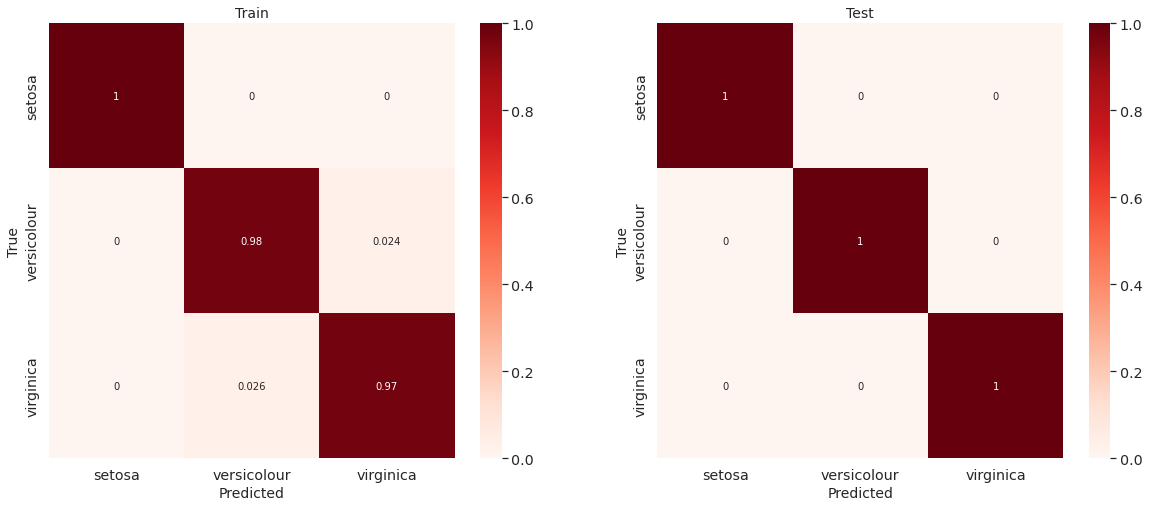

In [73]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Test", fontsize=14);

Looking at the confusions matrices for training, setosa perfectly separates from two other classes. In the test confusion matrix we see perfect classification (very unusual and suspect in the real world)

# Task:  20 class text classifier via Naive Bayes
Your task here is to build a gridsearch pipeline like the one presented in the previous sections; please adapt it to get your multi-class text classifier pipeline using cross fold validation on all 20 classes from the `20 newsgroups dataset`. Here are some hyperparameters to consider but don't limit yourself to these:

* number of terms
* types of ngrams
* TFIDF
* Naive Bayes classifier type and smoothing



Have fun! Please report your best score and configuration. And discuss your confusion matrix analysis for the best configuration.


##  Task: Pipeline & Grid search

This grid search will take some time (at least 20 minutes or more to run on a 4-core machine). Recall the following GridSearch will use all available cores: 

```python
GridSearchCV(pipelinee, parameters, cv=3, n_jobs=-1, verbose=1)
```

since `n_jobs` is set to `-1` 

Perform grid search where the score being used to evaluate each hyperparameter combination is `precision_macro`.

In [88]:
%%time

from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

%matplotlib inline

##############################################################################
np.random.seed(42)

# Use all categories for the analysis

categories = None

print("Loading 20 newsgroups dataset:")

data = fetch_20newsgroups(subset='train', categories=categories)

print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()


# #############################################################################
# Define a pipeline combining  text feature extractors 
# countVectorizer and TfidfTransformer
# with MultinomialNB 
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = Pipeline([('vect', CountVectorizer()),  
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB())])
# TODO - change the following code
# pipeline =                     
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#



if __name__ == "__main__":
    # #############################################################################
    # Set up Grid search using the defined pipeline 
    # and parameters 
    # Make sure to use 3 folds for cross validation
    # use macro average precision scores scoring='precision_macro'
    # I.e., macro average: compute precision for each class and take avg
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    scoring='precision_macro'
    # select handful of parameters to explore
    parameters = {'vect__ngram_range': ((1,1),(1,2)),
                  'tfidf__use_idf': (True, False),
                  'clf__alpha': (1e-7, 1e-5, 1e-3, 1), #laplace
                  }
    grid_search = GridSearchCV(pipeline ,param_grid = parameters , cv = 3, scoring= 'precision_macro', verbose=1)
    # TODO - change the following code
    #parameters = {'vect__ngram_range': ((1,1),(1,2)),
    #              'tfidf__use_idf': (True, False),
    # grid_search = GridSearchCV(.... scoring='precision_macro')                    
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best parameters set found on development set:")
    print()
    print(grid_search.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
         #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
         print()

    '''print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid_search.predict(X_test)
    print(classification_report(y_true, y_pred))
    print() 
    '''
    
    scoring='precision_macro'
     # Print best accuracy score and best parameter combination
    print("Best %s score: %0.3f" %(scoring, grid_search.best_score_))
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    #Sort the grid search results in decreasing order of average         
    sortedGridSearchResults = sorted(zip(grid_search.cv_results_["params"], grid_search.cv_results_["mean_test_score"]), 
           key=lambda x: x[1], reverse=True)
    print(f'Top 2 GridSearch results: ({scoring}, hyperparam Combo)\n {sortedGridSearchResults[0]}\n {sortedGridSearchResults[1]}\n\n\n')
    #print(f'{grid_search.cv_results_['mean_test_score']}')
    print(f'{grid_search.cv_results_["mean_test_score"]}')
    print(f'{grid_search.cv_results_["params"]}')
    print(f'{grid_search.cv_results_}')  #show everything  
 
 

Loading 20 newsgroups dataset:
11314 documents
20 categories

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-07, 1e-05, 0.001, 1),
 'tfidf__use_idf': (True, False),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
done in 356.570s

Best parameters set found on development set:

{'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

Grid scores on development set:

















Best precision_macro score: 0.909
Best parameters set:
	clf__alpha: 0.001
	tfidf__use_idf: False
	vect__ngram_range: (1, 2)
Top 2 GridSearch results: (precision_macro, hyperparam Combo)
 ({'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}, 0.9093570986443024)
 ({'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}, 0.9086000522061483)



[0.879778   0.89818939 0.88836105 0.89890449 0.88770803 0.9015219
 0.89571759 0.90300156 0.90076685 0.90860005 0

## Confusion matrix for train data: 

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
preds_train = grid_search.best_estimator_.predict(data.data)

cm_train = confusion_matrix(data.target, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_train.size #20 classes by 20 classes

400

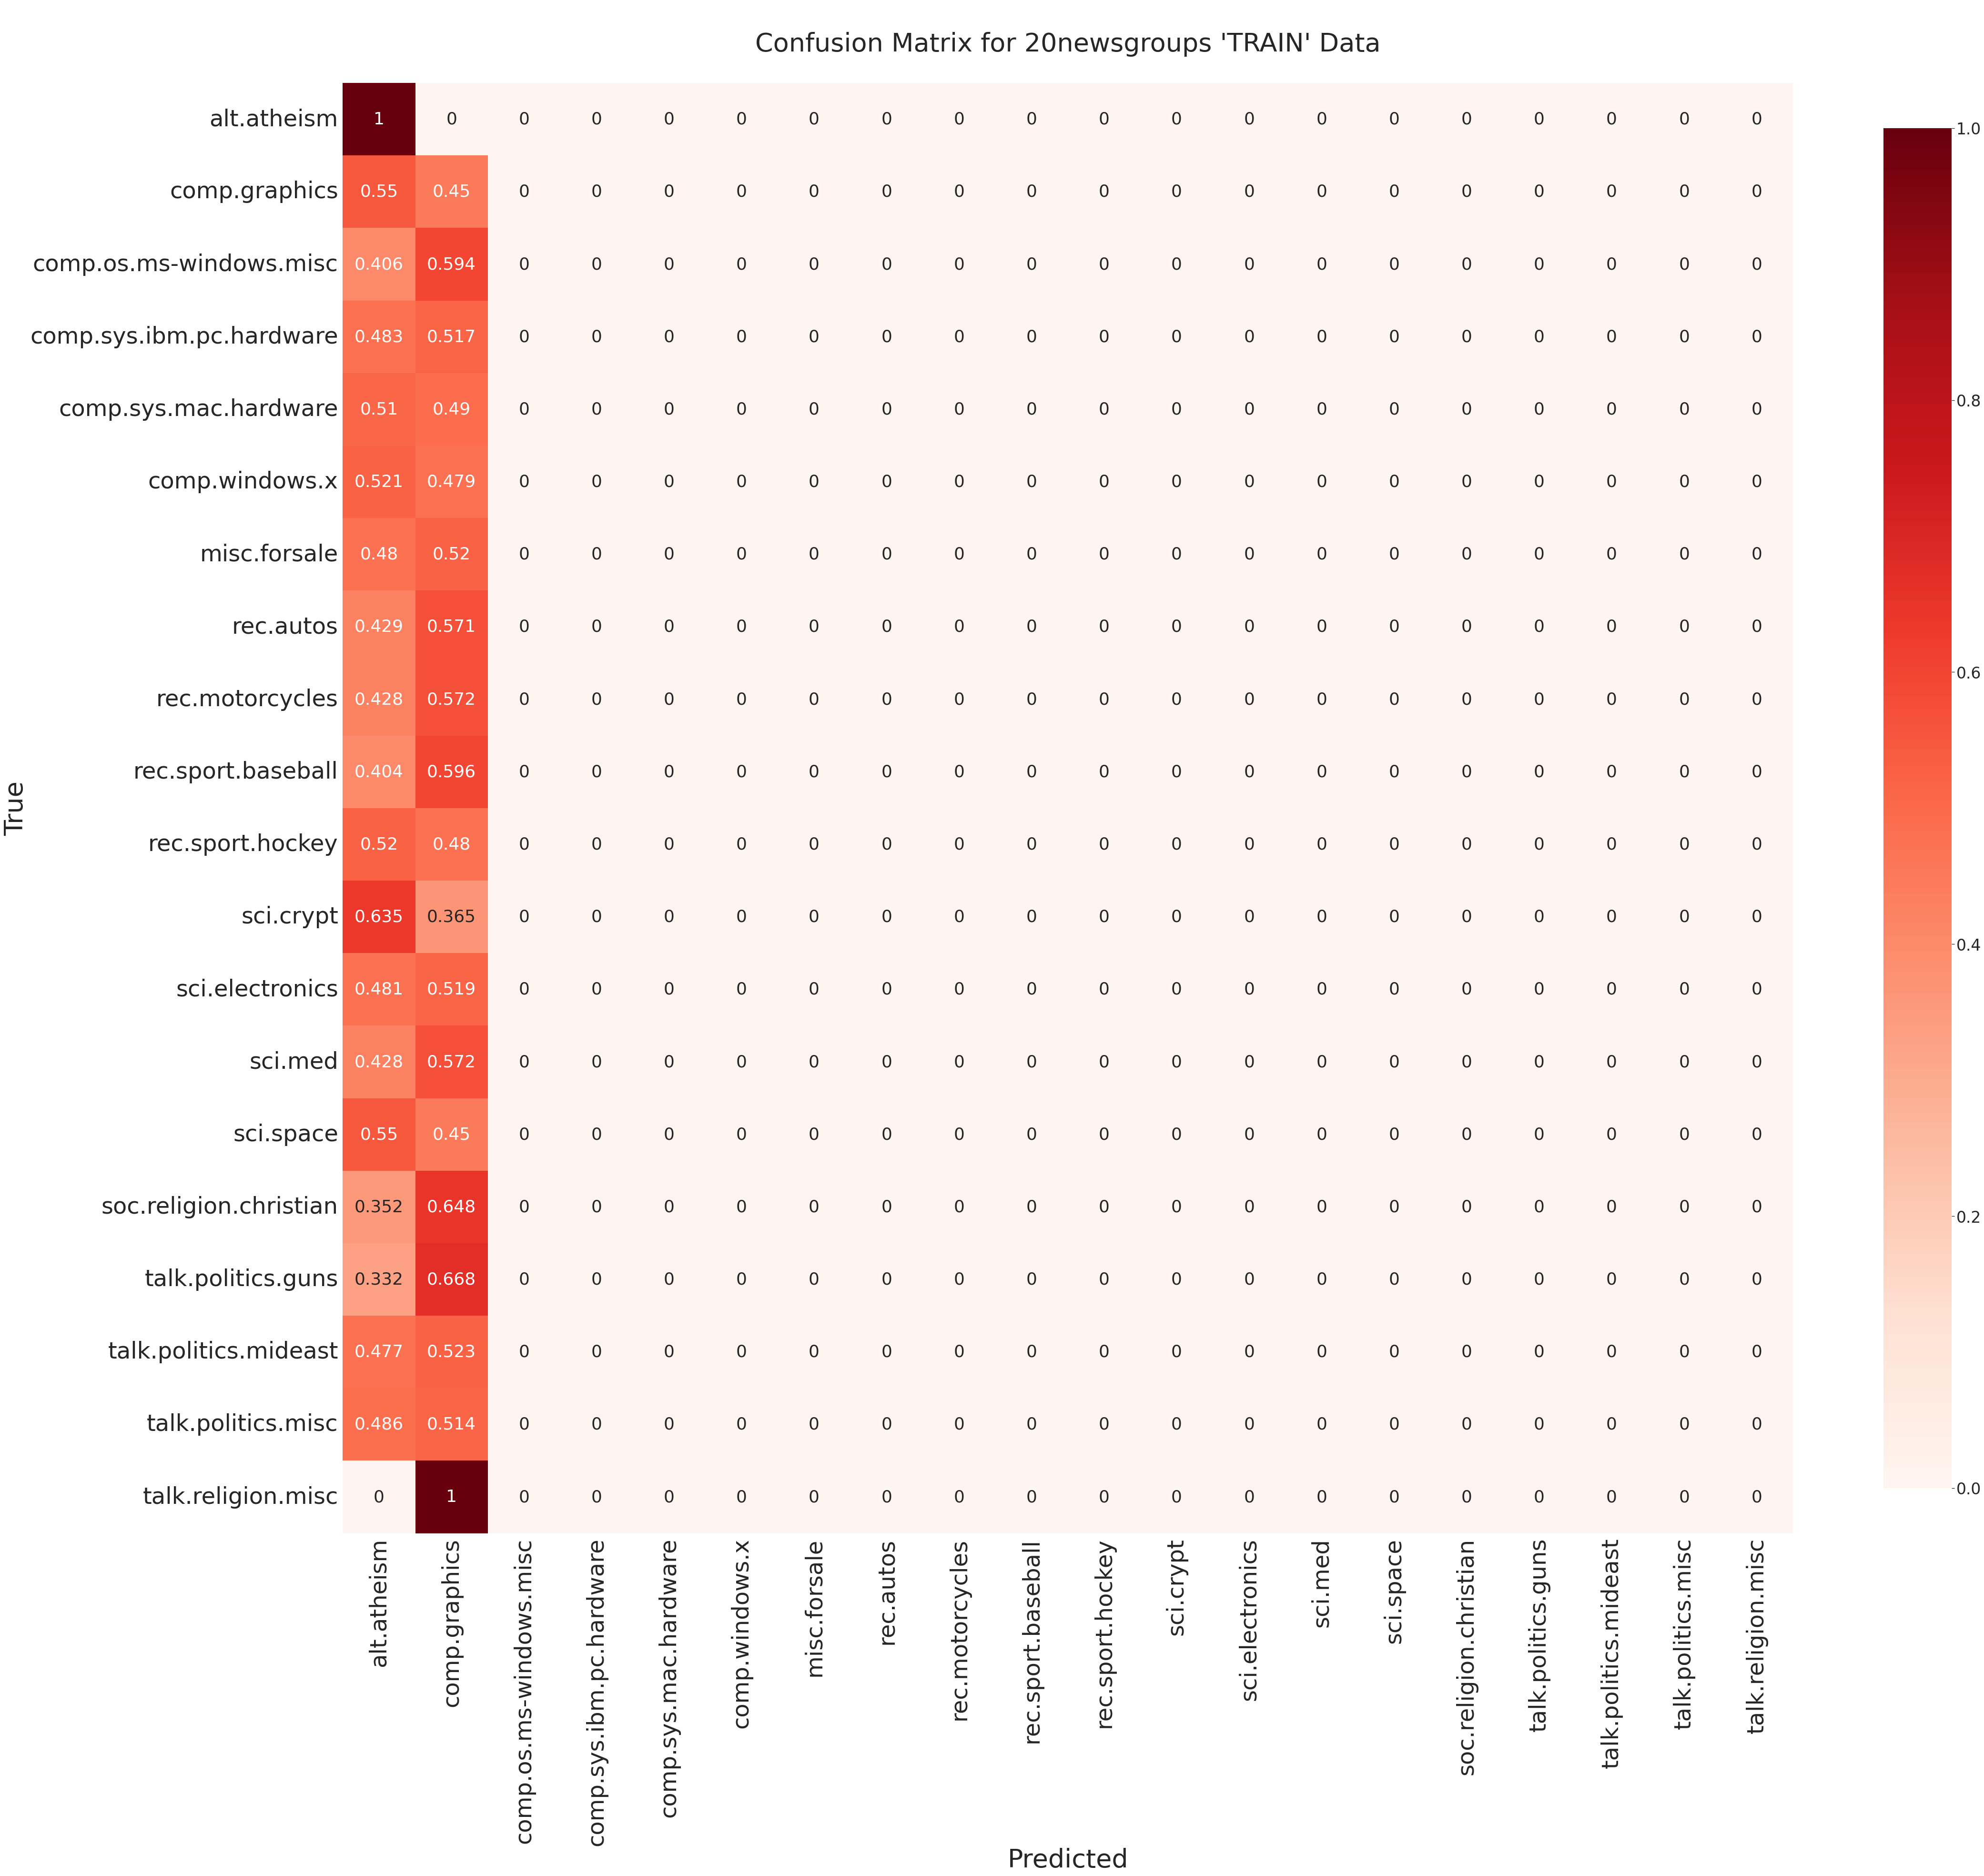

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(150,150))
sns.set(font_scale=3)
plt.subplot(121)
g = sns.heatmap(cm_train, fmt='.3g', vmin=0, vmax=1, annot=True, cmap="Reds", square=True, cbar_kws={'shrink':.35})
plt.xlabel("Predicted", fontsize=54)
plt.ylabel("True", fontsize=54)
g.set(xticklabels=data.target_names, yticklabels=data.target_names)
plt.xticks(rotation='vertical',fontsize=48)
plt.yticks(rotation='horizontal',fontsize=48)
plt.title("\nConfusion Matrix for 20newsgroups 'TRAIN' Data\n", fontsize=54);

## Confusion matrix for test data: 

In [81]:
data = fetch_20newsgroups(subset='test', categories=categories)

In [82]:
preds_train = grid_search.best_estimator_.predict(data.data)

cm_train = confusion_matrix(data.target, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_train.size #20 classes by 20 classes

400

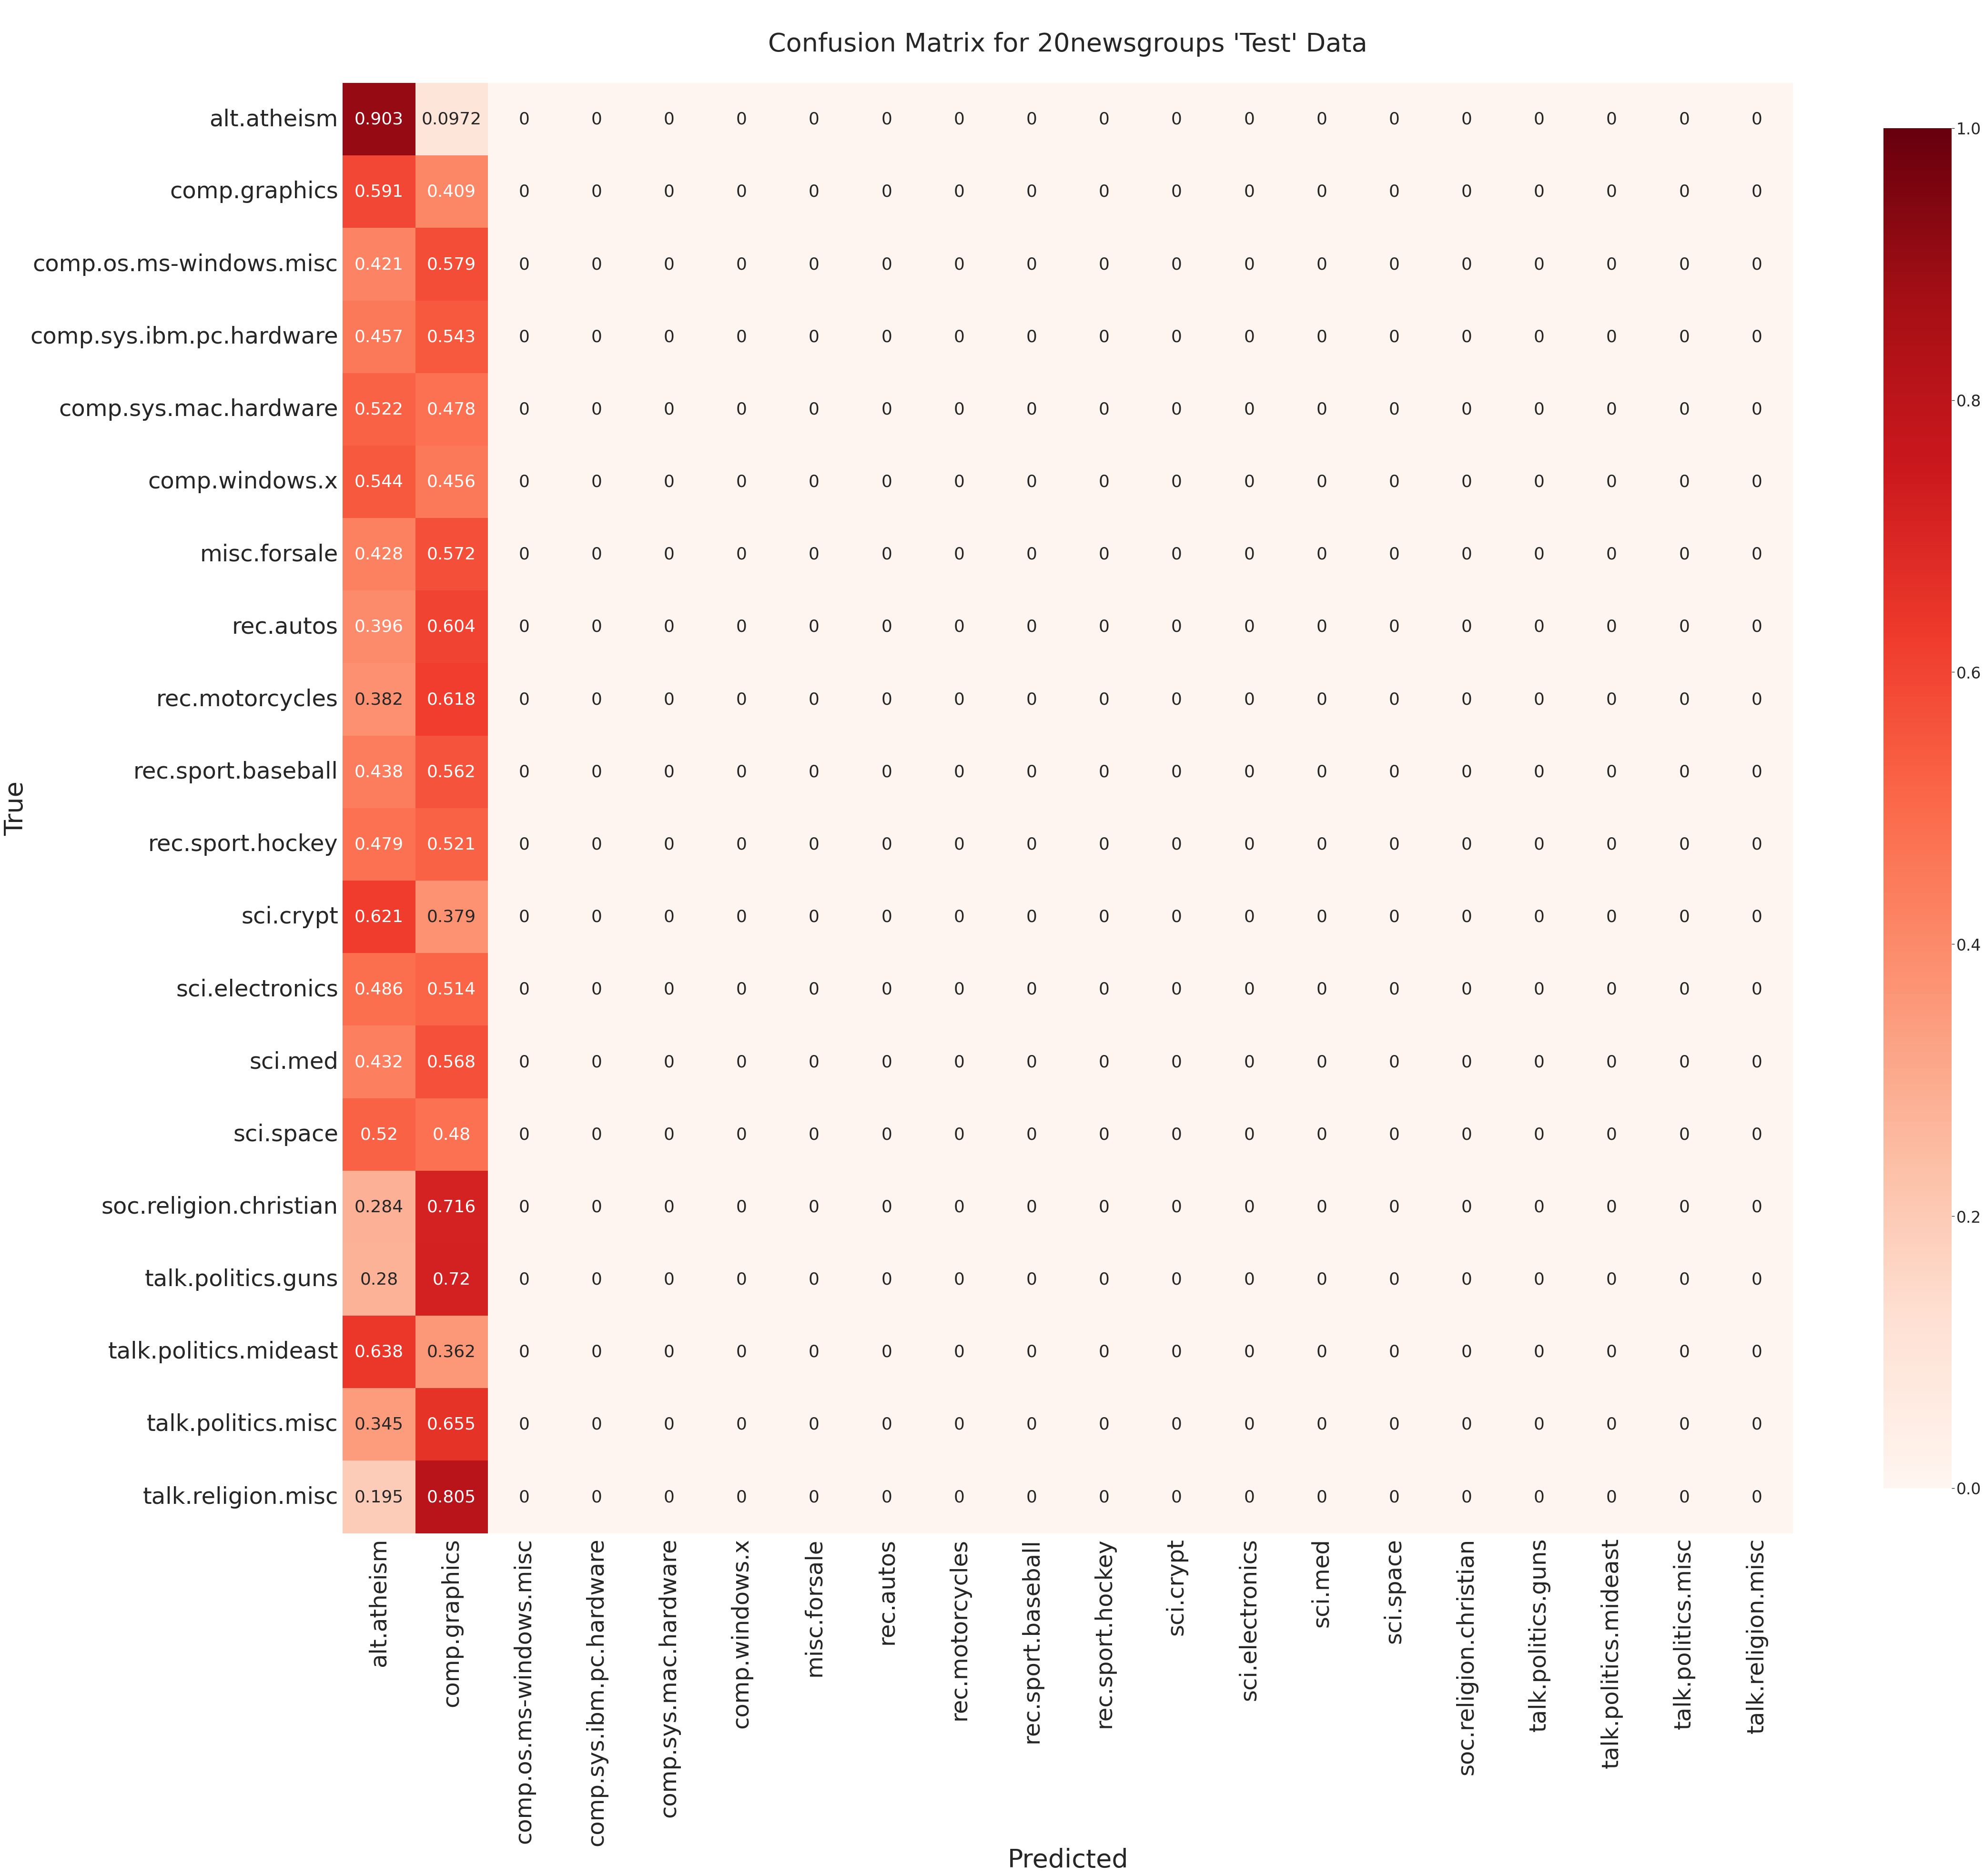

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(150,150))
sns.set(font_scale=3)
plt.subplot(121)
g = sns.heatmap(cm_train, fmt='.3g', vmin=0, vmax=1, annot=True, cmap="Reds", square=True, cbar_kws={'shrink':.35})
plt.xlabel("Predicted", fontsize=54)
plt.ylabel("True", fontsize=54)
g.set(xticklabels=data.target_names, yticklabels=data.target_names)
plt.xticks(rotation='vertical',fontsize=48)
plt.yticks(rotation='horizontal',fontsize=48)
plt.title("\nConfusion Matrix for 20newsgroups 'Test' Data\n", fontsize=54);

# OPTIONAL: Multinomial/Bernoulli Laplace Smoothed  Naive Bayes Homegrown
## Multinomial Laplace Smoothed  Naive Bayes Homegrown
The following is an implementation of multinomial Naive Bayes class for text classification. Complete the following code and report the accuracy for homegrown MultinomialNaiveBayes model.


In [84]:
#Adapted from  https://gist.github.com/asdfgeoff/5d63704c17052e642d3ea93351dda152
#        and based on https://geoffruddock.com/naive-bayes-from-scratch-with-numpy/

from typing import Callable, Union
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils.validation import check_X_y, check_array
from IPython.display import display

array_like = Union[list, np.ndarray]
matrix_like = Union[np.ndarray, pd.DataFrame]


def make_spam_dataset() -> (pd.DataFrame, np.ndarray, Callable):
    """ Create a small toy dataset for MultinomialNB implementation

    Returns:
        X: docXterm word count matrix
        y: indicator of whether or not message is spam
        msg_tx_func: a function to transform new test data into word count matrix
    """

    vocab = [
        'secret', 'offer', 'low', 'price', 'valued', 'customer', 'today',
        'dollar', 'million', 'sports', 'is', 'for', 'play', 'healthy', 'pizza'
    ]

    spam = [
        'million dollar offer',
        'secret offer today',
        'secret is secret'
    ]

    not_spam = [
        'low price for valued customer',
        'play secret sports today',
        'sports is healthy',
        'low price pizza'
    ]

    all_messages = spam + not_spam

    vectorizer = CountVectorizer(vocabulary=vocab)
    word_counts = vectorizer.fit_transform(all_messages).toarray()
    df = pd.DataFrame(word_counts, columns=vocab)
    is_spam = [1] * len(spam) + [0] * len(not_spam)
    msg_tx_func = lambda x: vectorizer.transform(x).toarray() #convert sparse docXterm to dense docXterm
    print("Doc by Term matrix word count")
    display(pd.DataFrame(np.c_[["Spam", "Spam", "Spam", "NotSpam", "NotSpam", "NotSpam", "NotSpam"], word_counts], columns=["CLASS"]+vocab))
    # return docXterm matrix, y class vector,  sparse docXterm to dense docXterm converter
    return df.to_numpy(), np.array(is_spam), msg_tx_func
    

class MultinomialNaiveBayes(object):
    """ DIY implementation of binary Naive Bayes classifier based on categorical data
        based on Multinomial version of P(word_i|C)

    Notes:
        - inspired by http://kenzotakahashi.github.io/naive-bayes-from-scratch-in-python.html
        - cannot fully vectorize fit method, since classes may have unequal sizes

    """

    def __init__(self, alpha=1.0):
        """ """
        self.alpha = alpha #smoothing
        self.prior = None
        self.word_counts = None
        self.word_proba = None
        self.is_fitted_ = False

    def fit(self, X: matrix_like, y: array_like):
        """ Fit training data for Naive Bayes classifier """

        # not strictly necessary, but this ensures we have clean input
        X, y = check_X_y(X, y)
        n = X.shape[0]

        X_by_class = np.array([X[y == c] for c in np.unique(y)])
        """X_by_class: [array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                                [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
                                [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
                         array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                                [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])] """
        print(f"X_by_class: {X_by_class}")
        self.prior = np.array([len(X_class) / n for X_class in X_by_class]) #priors

        self.smoothed_word_counts = np.array([sub_arr.sum(axis=0) for sub_arr in X_by_class]) + self.alpha
        print(f"self.word_counts:{self.word_counts}")
        self.lk_word = self.smoothed_word_counts / self.smoothed_word_counts.sum(axis=1).reshape(-1, 1)
        print(f"self.lk_word:{self.lk_word}")
        self.is_fitted_ = True
        return self

    def predict_proba(self, X: matrix_like):
        """ Predict probability of class membership """

        assert self.is_fitted_, 'Model must be fit before predicting'
        X = check_array(X)

        # loop over each observation to calculate conditional probabilities
        class_numerators = np.zeros(shape=(X.shape[0], self.prior.shape[0]))
        for i, x in enumerate(X):
            word_exists = x.astype(bool)
            lk_words_present = self.lk_word[:, word_exists] ** x[word_exists]
            lk_message = (lk_words_present).prod(axis=1)
            class_numerators[i] = lk_message * self.prior

        normalize_term = class_numerators.sum(axis=1).reshape(-1, 1)
        conditional_probas = class_numerators / normalize_term
        assert (conditional_probas.sum(axis=1) - 1 < 0.001).all(), 'Rows should sum to 1'
        return conditional_probas

    def predict(self, X: matrix_like):
        """ Predict class with highest probability """
    
        return self.predict_proba(X).argmax(axis=1)

        


def test_against_benchmark():
    """ Check that DIY model matches outputs from scikit-learn estimator """
    from sklearn.naive_bayes import MultinomialNB
    X, y, _ = make_spam_dataset()
    print(y)
    bench = MultinomialNB().fit(X, y)
    model = MultinomialNaiveBayes(alpha=1).fit(X, y) #homegrown
    
    posterior_probs = model.predict_proba(X)
    
    print("Posterior probs via the Multinomial Laplace Smoothed  Naive Bayes model")
    display(pd.DataFrame(np.c_[["Spam", "Spam", "Spam", "NotSpam", "NotSpam", "NotSpam", "NotSpam"], posterior_probs], 
                         columns=["CLASS", "Pr(NotSpam|Doc)", "Pr(SPAM|Doc)"]))

    ## Complete code to calculate the accurracy
    ##
    ##
    
    print(f"the accuracy of the sklearn  MultinomialNaiveBayes model on the training set is {acc:.5f}")
    print(f"the accuracy of the homegrown  MultinomialNaiveBayes model on the training set is {acc:.5f}")
    
    #breakpoint()
    #import pdb;  pdb.set_trace() 
    print("after breakpoint")
    assert (model.prior / np.exp(bench.class_log_prior_) - 1 < 0.001).all()
    print('[✔︎] Identical prior probabilities')
    
    assert (model.lk_word / np.exp(bench.feature_log_prob_) - 1 < 0.001).all()
    print('[✔︎] Identical word likelihoods')
    
    assert (model.predict_proba(X) / bench.predict_proba(X) - 1 < 0.001).all()
    print('[✔︎] Identical predictions')


if __name__ == '__main__':
    test_against_benchmark()

Doc by Term matrix word count


CLASS secret offer low price valued customer today dollar million sports  \
0     Spam      0     1   0     0      0        0     0      1       1      0   
1     Spam      1     1   0     0      0        0     1      0       0      0   
2     Spam      2     0   0     0      0        0     0      0       0      0   
3  NotSpam      0     0   1     1      1        1     0      0       0      0   
4  NotSpam      1     0   0     0      0        0     1      0       0      1   
5  NotSpam      0     0   0     0      0        0     0      0       0      1   
6  NotSpam      0     0   1     1      0        0     0      0       0      0   

  is for play healthy pizza  
0  0   0    0       0     0  
1  0   0    0       0     0  
2  1   0    0       0     0  
3  0   1    0       0     0  
4  0   0    1       0     0  
5  1   0    0       1     0  
6  0   0    0       0     1

[1 1 1 0 0 0 0]
X_by_class: [array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
 array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])]
self.word_counts:None
self.lk_word:[[0.06666667 0.03333333 0.1        0.1        0.06666667 0.06666667
  0.06666667 0.03333333 0.03333333 0.1        0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]
 [0.16666667 0.125      0.04166667 0.04166667 0.04166667 0.04166667
  0.08333333 0.08333333 0.08333333 0.04166667 0.08333333 0.04166667
  0.04166667 0.04166667 0.04166667]]
Posterior probs via the Multinomial Laplace Smoothed  Naive Bayes model


CLASS      Pr(NotSpam|Doc)          Pr(SPAM|Doc)
0     Spam  0.05382674516400337    0.9461732548359966
1     Spam  0.10215482841181166    0.8978451715881883
2     Spam  0.14578587699316628    0.8542141230068336
3  NotSpam   0.9691902710270238  0.030809728972976166
4  NotSpam   0.6209824135839903    0.3790175864160097
5  NotSpam   0.8037676609105181   0.19623233908948196
6  NotSpam   0.9247441300421433   0.07525586995785671

the accuracy of the sklearn  MultinomialNaiveBayes model on the training set is 0.36500
the accuracy of the homegrown  MultinomialNaiveBayes model on the training set is 0.36500
after breakpoint
[✔︎] Identical prior probabilities
[✔︎] Identical word likelihoods
[✔︎] Identical predictions


## OPTIONAL TASK: Implement the Laplace = 1 smoothed Bernouilli Naive Bayes 
Adapt the code given in the above section to implement Laplace = 1 smoothed Bernouilli Naive Bayes.  Please report the  accuracy for homegrown Laplace = 1 smoothed Bernouilli Naive Bayes  model on the training set. 

In [85]:
class BernoulliNaiveBayes(object):
    """
    Complete comments and implementation of BernoulliNaiveBayes
    """
    def __init__(self, alpha=1.0):
        """ """
        self.alpha = alpha #smoothing
        self.prior = None
        self.word_counts = None
        self.word_proba = None
        self.is_fitted_ = False

    def fit(self, X: matrix_like, y: array_like):
        """ Fit training data for Naive Bayes classifier """
        #==================================================#
        #               Your code starts here              #
        
        
        
        #==================================================#
         return self

    def predict_proba(self, X: matrix_like):
        """ Predict probability of class membership """
        
        #==================================================#
        #               Your code starts here              #
        
        
        
        #==================================================#
        

         return conditional_probas

    def predict(self, X: matrix_like):
        """ Predict class with highest probability """
        return self.predict_proba(X).argmax(axis=1)

def test_against_benchmark():
    """ Check that DIY model matches outputs from scikit-learn estimator """
    from sklearn.naive_bayes import MultinomialNB
    X, y, _ = make_spam_dataset()
    print(y)
    bench = ???????().fit(X, y) #against SKLearns implementation
    model = BernoulliNaiveBayes(alpha=1).fit(X, y) #homegrown
    
    posterior_probs = model.predict_proba(X)
    
    print("Posterior probs via the Bernoilli Laplace Smoothed  Naive Bayes model")
    display(pd.DataFrame(np.c_[["Spam", "Spam", "Spam", "NotSpam", "NotSpam", "NotSpam", "NotSpam"], posterior_probs], 
                         columns=["CLASS", "Pr(NotSpam|Doc)", "Pr(SPAM|Doc)"]))

    ## Complete code to calculate the accurracy
    ##
    ##
    
    
    print(f"the accuracy of the sklearn Bernoilli NB model on the training set is {acc:.5f}")
    print(f"the accuracy of the homegrown Bernoilli NB model on the training set is {acc:.5f}")
    #breakpoint()
    #import pdb;  pdb.set_trace() 
    assert (model.prior / np.exp(bench.class_log_prior_) - 1 < 0.001).all()
    print('[✔︎] Identical prior probabilities')
    
    assert (model.lk_word / np.exp(bench.feature_log_prob_) - 1 < 0.001).all()
    print('[✔︎] Identical word likelihoods')
    
    assert (model.predict_proba(X) / bench.predict_proba(X) - 1 < 0.001).all()
    print('[✔︎] Identical predictions')


if __name__ == '__main__':
    test_against_benchmark()

IndentationError: unexpected indent (<ipython-input-85-259e10ff7c25>, line 21)